
# # Spotify Saved Tracks Analysis
#
# This notebook analyzes the enriched data retrieved from Spotify, focusing on trends in added tracks, release dates, popularity, genres, artists, and albums.
#
# It uses the custom library `analysis_func` based on the available data (excluding detailed audio features).


In [2]:

# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # To potentially construct paths if needed

# Your Custom Libraries (as specified)
try:
    from libraries.analysis import analysis_func as af
    # from libraries.external_apps import spotify_func as sp # sp seems unused here, but importing if needed
    print("Custom libraries imported successfully.")
except ImportError as e:
    print(f"Error importing custom libraries: {e}")
    print("Please ensure the notebook is run from a location where it can find the 'libraries' directory.")
    # Optionally add sys.path modification here if needed, but better to run from the correct location
    # import sys
    # sys.path.append('path/to/your/project/root')
    # from libraries.analysis import analysis_func as af

# Configure plotting style (optional)
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.autolayout'] = True # Often helps with layout

# Define the path to your final data file
# This path comes from your spotify_func.py script
DATA_PATH = '/Users/dougstrouth/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/datasets/spotify/saved_tracks_enriched_final.parquet'



Custom libraries imported successfully.



# ## 1. Load Data
#
# Load the final enriched Parquet file generated by `spotify_func.py`.


In [3]:
# Load the dataframe
try:
    df = pd.read_parquet(DATA_PATH)
    print(f"Successfully loaded {len(df)} tracks from: {DATA_PATH}")
except FileNotFoundError:
    print(f"ERROR: Data file not found at: {DATA_PATH}")
    print("Please ensure the path is correct and the file exists.")
    df = None # Set df to None if loading fails
except Exception as e:
    print(f"Error loading data: {e}")
    df = None

Successfully loaded 11326 tracks from: /Users/dougstrouth/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/datasets/spotify/saved_tracks_enriched_final.parquet



# ## 2. Initial Data Exploration
#
# Let's get a quick overview of the loaded data.


In [4]:
if df is not None:
    print("DataFrame Info:")
    df.info()
    print("\nFirst 5 Rows:")
    display(df.head())
    # print("\nBasic Descriptive Statistics (Numeric Columns):")
    # display(df.describe()) # Can be very wide, use display() in notebooks
else:
    print("DataFrame not loaded. Cannot perform exploration.")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   added_at                      11326 non-null  datetime64[ns, UTC]
 1   track_id                      11326 non-null  string             
 2   track_name                    11326 non-null  string             
 3   popularity                    11326 non-null  Int32              
 4   duration_ms                   11326 non-null  Int64              
 5   explicit                      11326 non-null  boolean            
 6   isrc                          11323 non-null  string             
 7   track_uri                     11326 non-null  string             
 8   track_href                    11326 non-null  string             
 9   track_external_url_spotify    11326 non-null  string             
 10  track_preview_url 

,added_at,track_id,track_name,popularity,duration_ms,explicit,isrc,track_uri,track_href,track_external_url_spotify,...,album_image_url_640,album_artist_ids,album_artist_names,release_datetime,release_year,artist_genres,artist_popularity,album_genres,album_popularity,album_label
0,2025-04-02 15:40:48+00:00,7Bz8yww6UMbTgTVLG6zbI4,Low Rider,72,190826,False,USRHD0610212,spotify:track:7Bz8yww6UMbTgTVLG6zbI4,https://api.spotify.com/v1/tracks/7Bz8yww6UMbT...,https://open.spotify.com/track/7Bz8yww6UMbTgTV...,...,https://i.scdn.co/image/ab67616d0000b273a07cc8...,3ICyfoySNDZqtBVmaBT84I,War,1975-01-01,1975,<NA>,61.0,<NA>,63,Avenue Records
1,2025-04-02 14:39:28+00:00,3lUVy400HL94NB03paDTyN,Death or Glory - Remastered,49,235000,True,GBARL1200691,spotify:track:3lUVy400HL94NB03paDTyN,https://api.spotify.com/v1/tracks/3lUVy400HL94...,https://open.spotify.com/track/3lUVy400HL94NB0...,...,https://i.scdn.co/image/ab67616d0000b273cd9d8b...,3RGLhK1IP9jnYFH4BRFJBS,The Clash,NaT,<NA>,punk,70.0,<NA>,65,Sony Music UK
2,2025-04-02 14:31:00+00:00,6aF5JtQSrh7wNrkDE9B0My,When Worlds Collide,66,177960,False,USDW19910703,spotify:track:6aF5JtQSrh7wNrkDE9B0My,https://api.spotify.com/v1/tracks/6aF5JtQSrh7w...,https://open.spotify.com/track/6aF5JtQSrh7wNrk...,...,https://i.scdn.co/image/ab67616d0000b273a4e8fa...,5imUS9dQyCbAjUEJJ9QyWC,Powerman 5000,1999-01-01,1999,"alternative metal, industrial, industrial meta...",53.0,<NA>,56,DreamWorks
3,2025-04-02 12:28:38+00:00,4vjr73F3KT000ii3fzPrib,Armageddon,51,169173,False,USVR90235308,spotify:track:4vjr73F3KT000ii3fzPrib,https://api.spotify.com/v1/tracks/4vjr73F3KT00...,https://open.spotify.com/track/4vjr73F3KT000ii...,...,https://i.scdn.co/image/ab67616d0000b273293ed8...,1aEYCT7t18aM3VvM6y8oVR,Alkaline Trio,2001-04-03,2001,"emo, emo pop, pop punk, punk, skate punk",58.0,<NA>,52,Vagrant Records
4,2025-04-01 23:35:36+00:00,4BFoLiWDZusUKvEvXDpDAF,Up N Down,51,167175,False,GXFCP2500009,spotify:track:4BFoLiWDZusUKvEvXDpDAF,https://api.spotify.com/v1/tracks/4BFoLiWDZusU...,https://open.spotify.com/track/4BFoLiWDZusUKvE...,...,https://i.scdn.co/image/ab67616d0000b273087af8...,"6XYhu7HPIJ47SY98bY1Hnx, 4pqY01dGuzojomnVCXYbXC","Kamino, MERYLL",2025-02-07,2025,"hardstyle, tech house",46.0,<NA>,40,Catch & Release


# ## 3. Time-Based Analysis
#
# Analyzing trends related to when tracks were added and when they were released.



--- Plotting Tracks Added Over Time (Monthly) ---


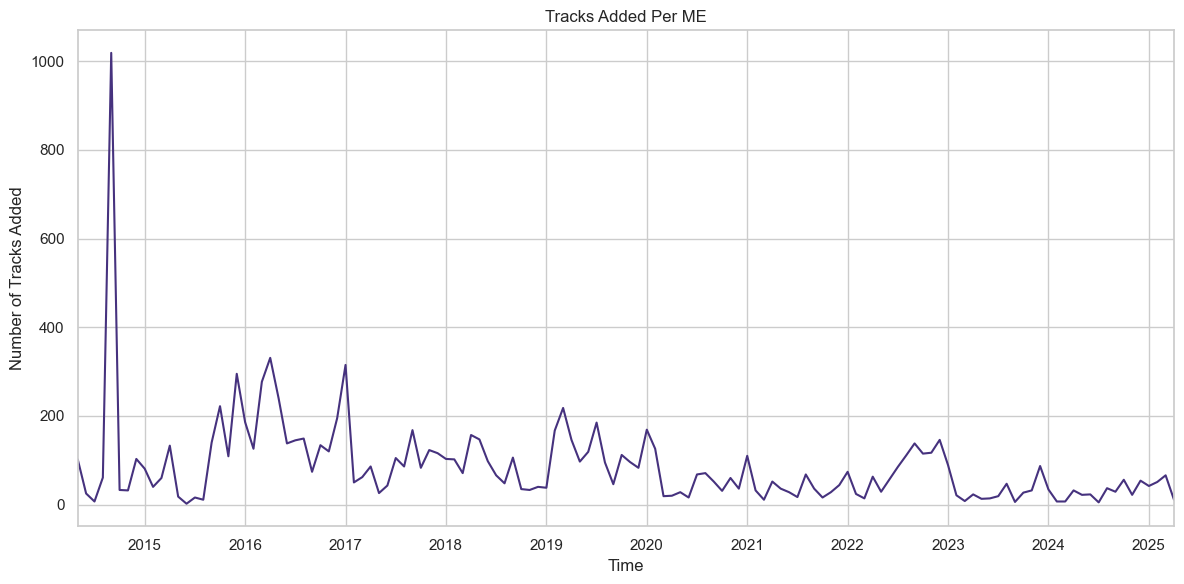


--- Plotting Tracks Added Over Time (Yearly) ---


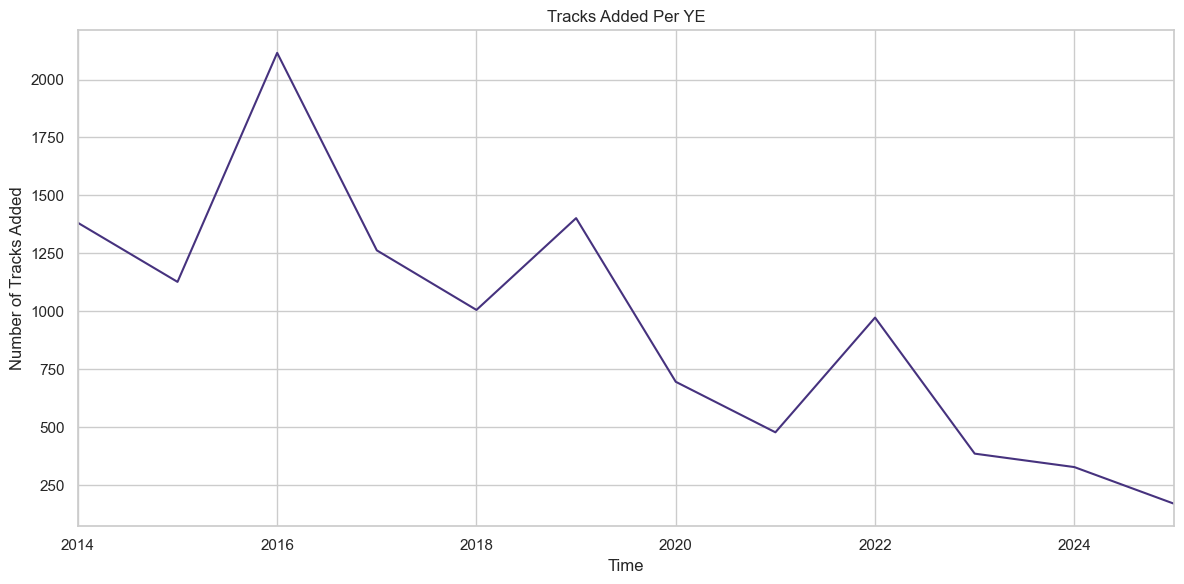


--- Plotting Release Year Distribution (Decade Bins) ---


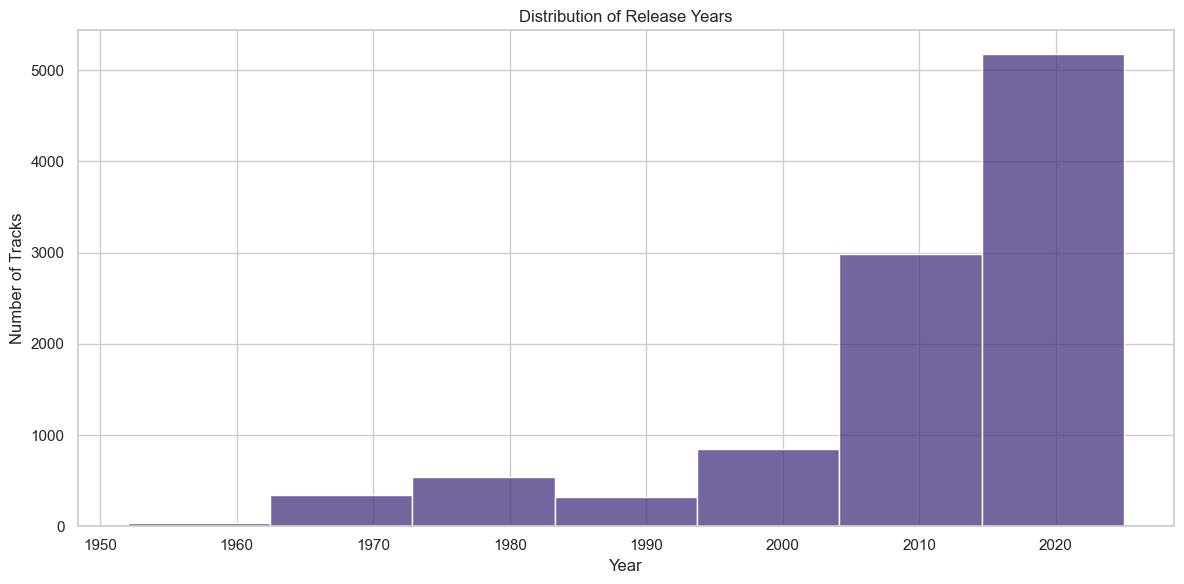


--- Plotting Add vs. Release Lag Distribution (Days) ---


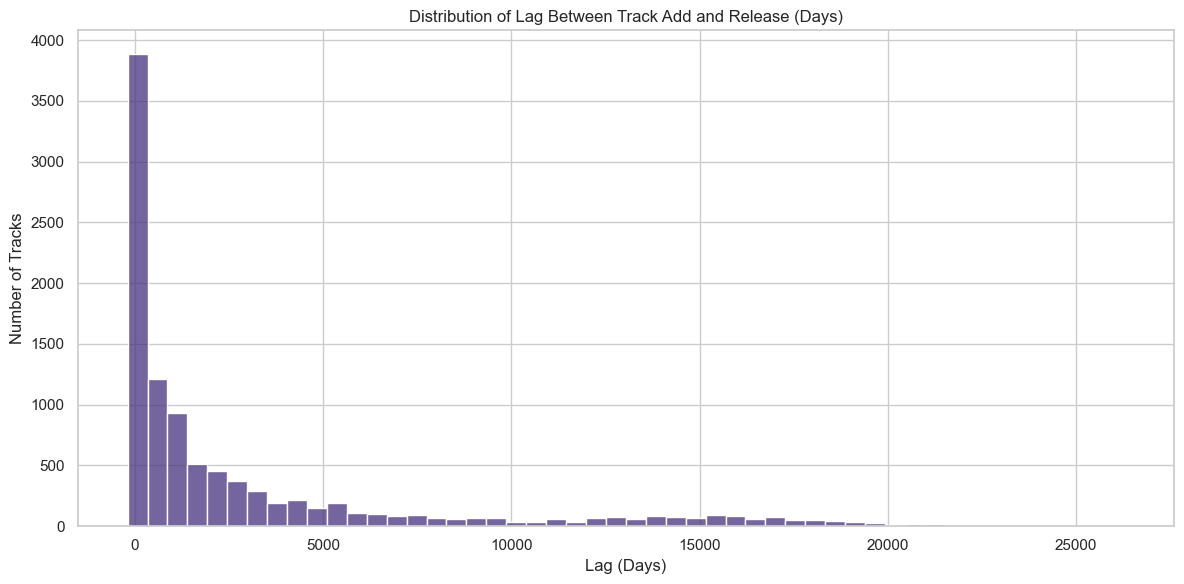

In [5]:
if df is not None:
    print("\n--- Plotting Tracks Added Over Time (Monthly) ---")
    ax_added_m = af.plot_tracks_added_distribution(df.copy(), period='ME') # Pass copy to avoid modifying original df
    if ax_added_m:
        plt.show()
    else:
        print("Could not generate monthly added tracks plot.")

    print("\n--- Plotting Tracks Added Over Time (Yearly) ---")
    ax_added_y = af.plot_tracks_added_distribution(df.copy(), period='YE')
    if ax_added_y:
        plt.show()
    else:
        print("Could not generate yearly added tracks plot.")

    print("\n--- Plotting Release Year Distribution (Decade Bins) ---")
    ax_release = af.plot_release_year_distribution(df.copy(), bin_size=10)
    if ax_release:
        plt.show()
    else:
        print("Could not generate release year distribution plot.")

    print("\n--- Plotting Add vs. Release Lag Distribution (Days) ---")
    ax_lag = af.plot_add_vs_release_lag_distribution(df.copy(), time_unit='days', bins=50)
    if ax_lag:
        # Optional: Zoom in if needed, as lag can be very large
        # lower, upper = df['add_release_lag_days'].quantile([0.01, 0.99]) # Assuming lag column added
        # ax_lag.set_xlim(lower, upper)
        plt.show()
    else:
        print("Could not generate add vs release lag plot.")

# ## 4. Popularity Analysis
#
# Exploring track and artist popularity scores.



--- Plotting Track Popularity Distribution ---


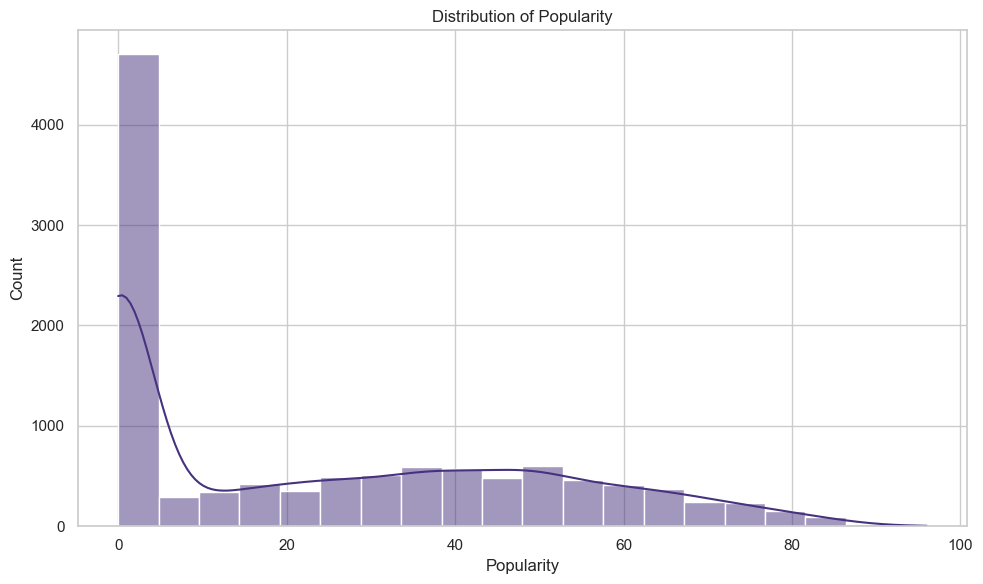


--- Plotting Artist Popularity Distribution ---


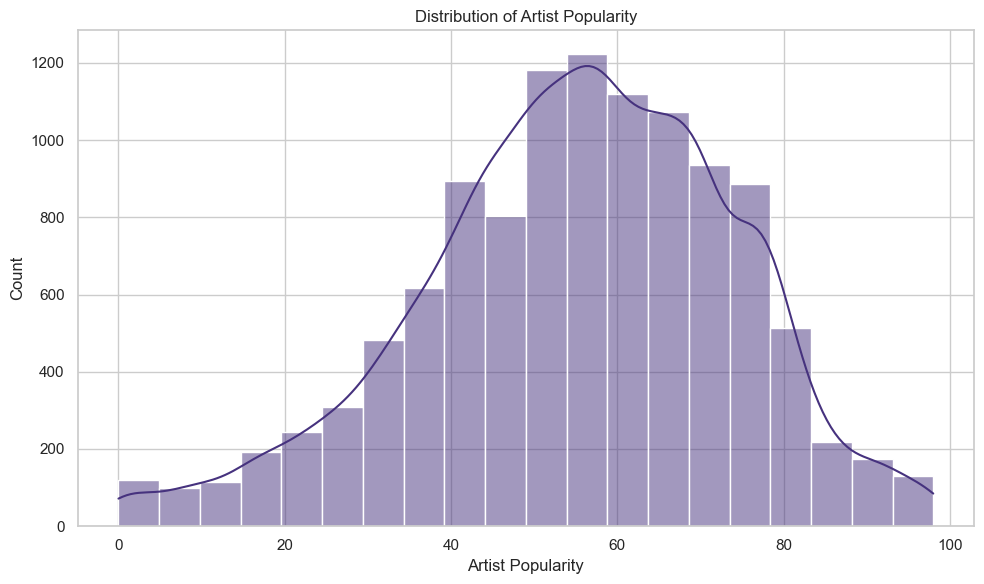


--- Plotting Track vs. Artist Popularity Correlation ---


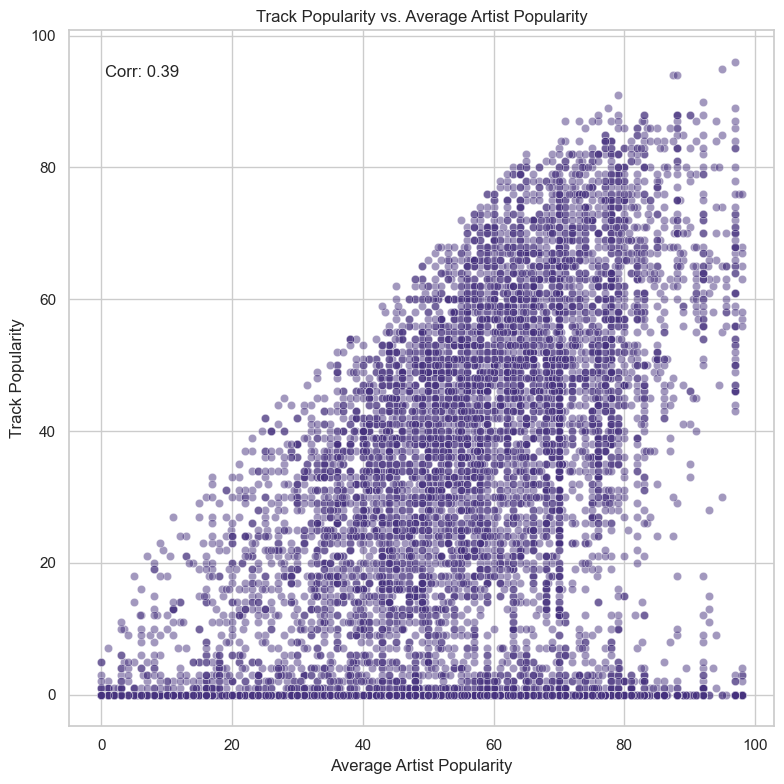


--- Plotting Popularity Trend Over Release Years ---


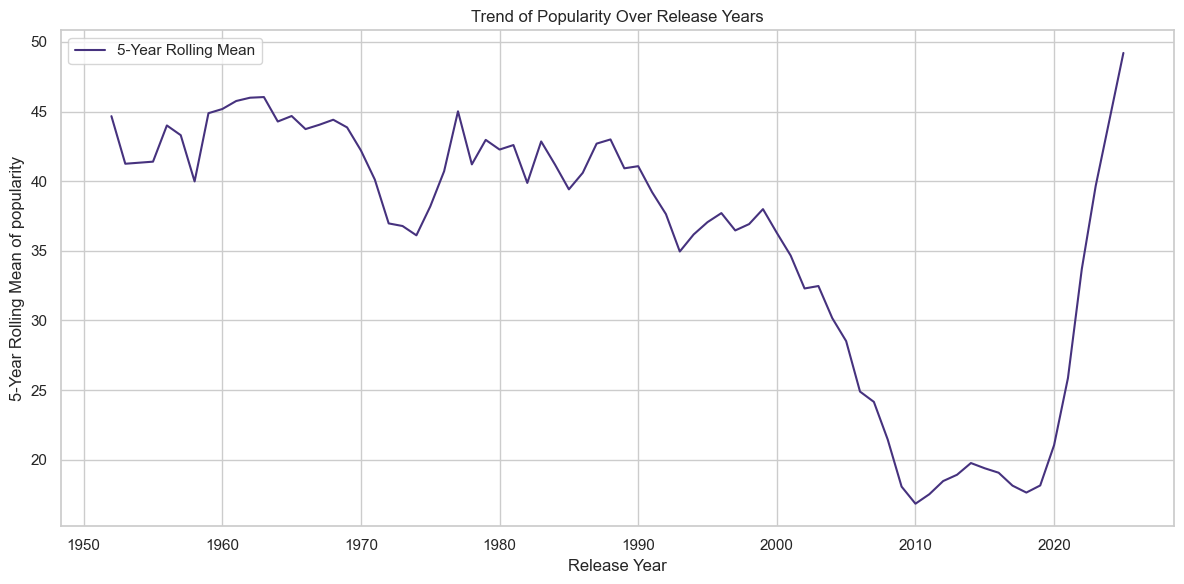

In [6]:
if df is not None:
    print("\n--- Plotting Track Popularity Distribution ---")
    ax_track_pop = af.plot_popularity_distribution(df.copy(), column='popularity')
    if ax_track_pop:
        plt.show()
    else:
        print("Could not generate track popularity plot.")

    # Check if artist_popularity exists before plotting
    if 'artist_popularity' in df.columns:
        print("\n--- Plotting Artist Popularity Distribution ---")
        ax_artist_pop = af.plot_popularity_distribution(df.copy(), column='artist_popularity')
        if ax_artist_pop:
            plt.show()
        else:
            print("Could not generate artist popularity plot (data might be missing/invalid).")
    else:
        print("Skipping artist popularity distribution: 'artist_popularity' column not found.")


    # Check if both popularity columns exist before plotting correlation
    if 'popularity' in df.columns and 'artist_popularity' in df.columns:
        print("\n--- Plotting Track vs. Artist Popularity Correlation ---")
        ax_pop_corr = af.plot_popularity_correlation(df.copy())
        if ax_pop_corr:
            plt.show()
        else:
            print("Could not generate popularity correlation plot (data might be missing/invalid).")
    else:
         print("Skipping popularity correlation: 'popularity' or 'artist_popularity' column not found.")

    print("\n--- Plotting Popularity Trend Over Release Years ---")
    ax_pop_trend = af.plot_feature_over_release_years(df.copy(), feature='popularity', window=5)
    if ax_pop_trend:
        plt.show()
    else:
        print("Could not generate popularity trend plot.")


# ## 5. Artist and Album Analysis
#
# Identifying the most frequent artists and albums in the saved tracks.



In [7]:
if df is not None:
    print("\n--- Top 15 Artists (by track count) ---")
    top_artists = af.get_top_n_artists(df.copy(), n=15)
    if top_artists is not None:
        display(top_artists)
    else:
        print("Could not retrieve top artists.")

    print("\n--- Top 15 Albums (by track count) ---")
    top_albums = af.get_top_n_albums(df.copy(), n=15)
    if top_albums is not None:
        display(top_albums)
    else:
        print("Could not retrieve top albums.")


--- Top 15 Artists (by track count) ---


,artist_ids,track_count
0,5K4W6rqBFWDnAN6FQUkS6x,151
1,2CIMQHirSU0MQqyYHq0eOx,144
2,6kACVPfCOnqzgfEF5ryl0x,105
3,2YZyLoL8N0Wb9xBt1NhZWg,100
4,3RGLhK1IP9jnYFH4BRFJBS,94
5,4aKdmOXdUKX07HVd3sGgzw,81
6,6FBDaR13swtiWwGhX1WQsP,73
7,0epOFNiUfyON9EYx7Tpr6V,67
8,10gzBoINW3cLJfZUka8Zoe,66
9,3TVXtAsR1Inumwj472S9r4,64



--- Top 15 Albums (by track count) ---


,album_id,album_name,track_count
0,2MCuxKwyn3Ce2VJpWRG9rh,Journey To ABGT250,42
1,5Zt1P3ZbnfErBkiqcfBTCN,Monstercat - Best of 2016,41
2,3TZuLZx0zB3Q45aQXDswb9,London Calling (Expanded Edition),40
3,2L83fSHt5ATeDdlL4o96su,Anjunadeep 10,37
4,4apfDLU5QtNOu784u2Z2B5,Words & Music: John Mellencamp's Greatest Hits,37
5,4E2eUhFHqTG2pu9MN1NDIF,The Essential Johnny Cash,36
6,6jC97YkMLknXxDfdSlPxTQ,The Collection,36
7,3ZHRUxp205uZ6h4Bxk8eRD,A State Of Trance Episode 735,32
8,3Zkggi5I9uH5x94DuN6u1S,Hits Back,32
9,4rqykrZisC5ZBnRXID9DjW,Group Therapy 250 Live from The Gorge Amphithe...,31


# 
# ## 6. Genre Analysis
#
# Diving into the genres associated with the saved tracks.




--- Plotting Top 25 Genre Distribution ---


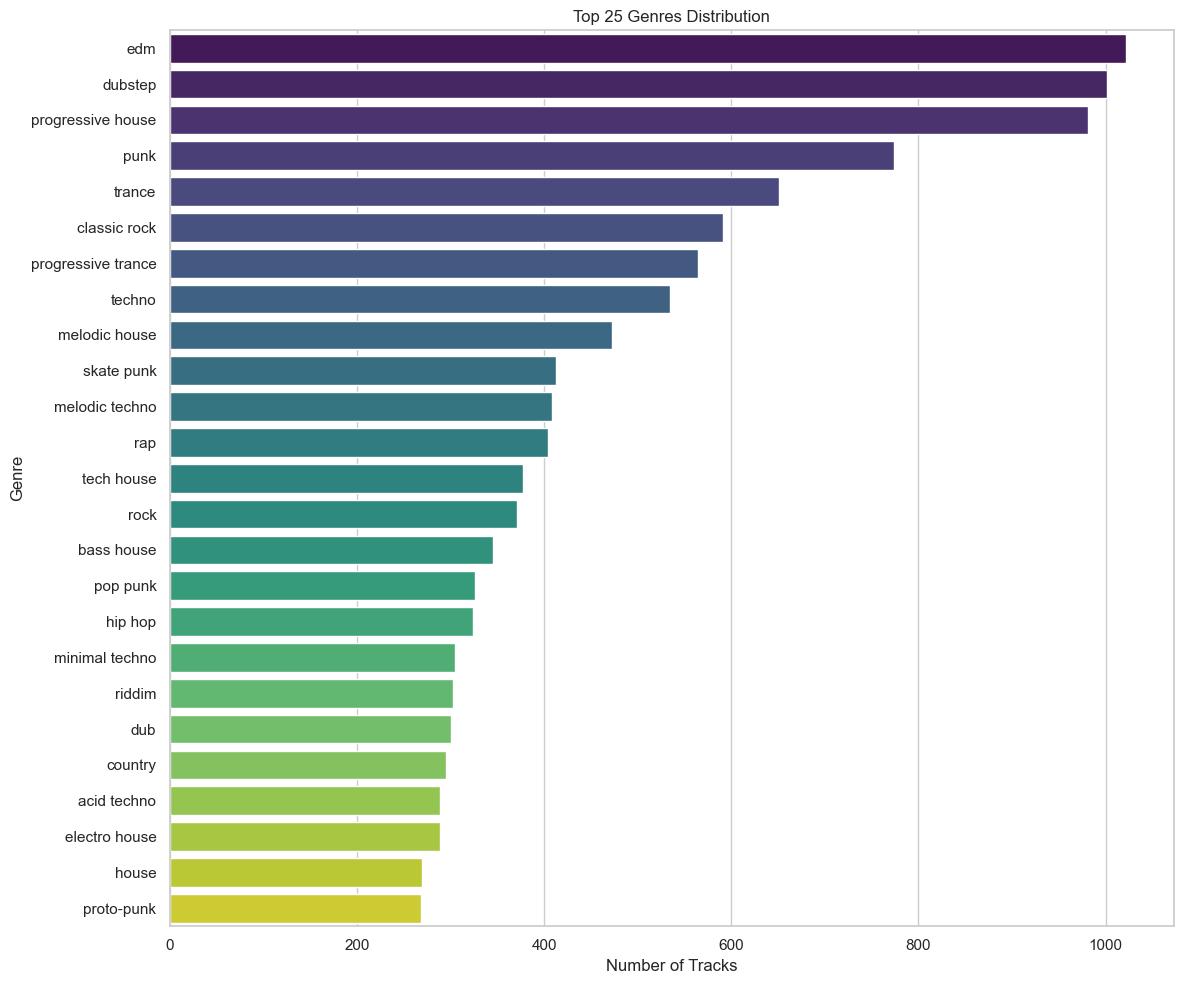


--- Plotting Track Popularity Distribution by Top 15 Genres (Box Plot) ---


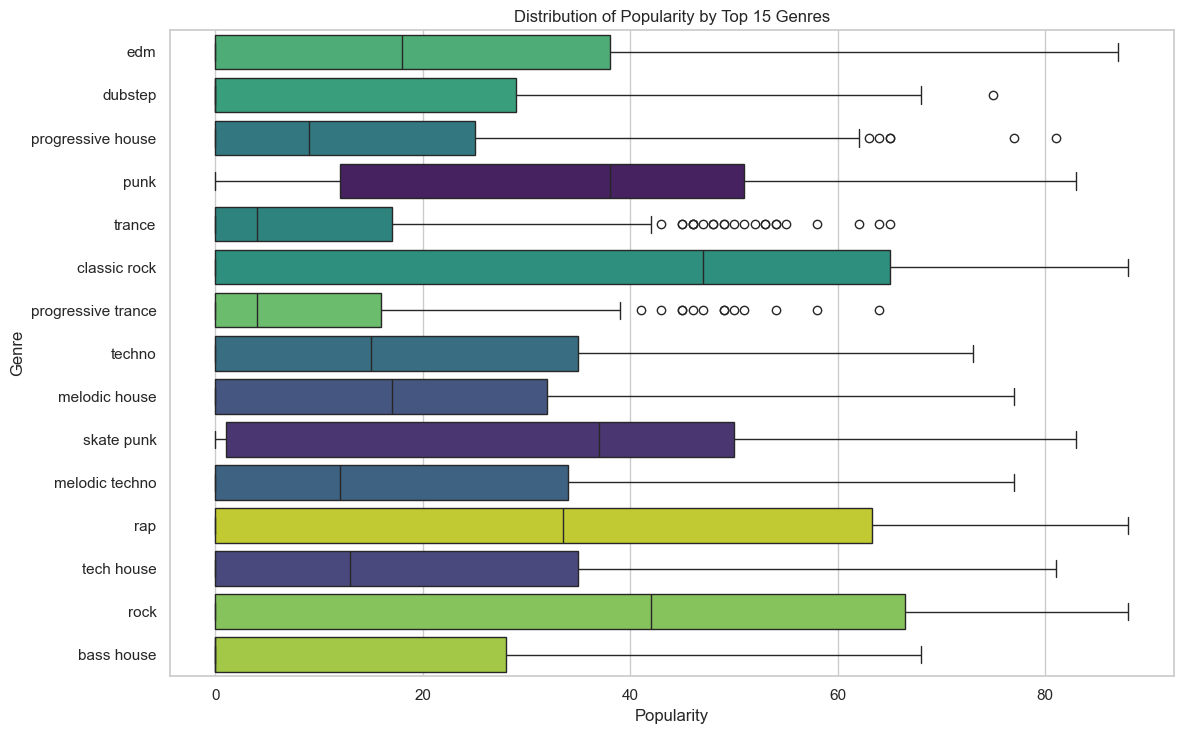


--- Analyzing Genre Explicitness ---
Top 15 Genres by Explicit Track Percentage:


,genre,explicit_percentage
0,go-go,100.0
1,sholawat,100.0
2,brazilian phonk,100.0
3,italian trap,100.0
4,gospel,100.0
5,country hip hop,100.0
6,argentine trap,100.0
7,arabic rap,100.0
8,drill,100.0
9,raï,100.0



--- Calculating Genre Diversity ---
Genre Diversity (Shannon Index): 4.963
Genre Diversity (Simpson Index): 0.988


In [8]:
if df is not None:
    print("\n--- Plotting Top 25 Genre Distribution ---")
    ax_genres = af.plot_genre_distribution(df.copy(), top_n=25)
    if ax_genres:
        # plt.tight_layout() # Sometimes helps, sometimes conflicts with suptitle
        plt.show()
    else:
        print("Could not generate genre distribution plot.")

    print("\n--- Plotting Track Popularity Distribution by Top 15 Genres (Box Plot) ---")
    ax_pop_genre_box = af.plot_feature_by_genre(df.copy(), feature='popularity', top_n_genres=15, plot_type='box')
    if ax_pop_genre_box:
        plt.show()
    else:
        print("Could not generate popularity by genre box plot.")

    # Example using violin plot
    # print("\n--- Plotting Artist Popularity Distribution by Top 10 Genres (Violin Plot) ---")
    # if 'artist_popularity' in df.columns:
    #     ax_pop_genre_violin = af.plot_feature_by_genre(df.copy(), feature='artist_popularity', top_n_genres=10, plot_type='violin')
    #     if ax_pop_genre_violin:
    #         plt.show()
    #     else:
    #         print("Could not generate artist popularity by genre violin plot.")
    # else:
    #     print("Skipping artist popularity by genre: 'artist_popularity' column not found.")


    print("\n--- Analyzing Genre Explicitness ---")
    explicit_genres = af.analyze_genre_explicitness(df.copy())
    if explicit_genres is not None:
        print("Top 15 Genres by Explicit Track Percentage:")
        display(explicit_genres.head(15))
    else:
        print("Could not analyze genre explicitness.")

    print("\n--- Calculating Genre Diversity ---")
    diversity_shannon = af.calculate_genre_diversity(df.copy(), method='shannon')
    diversity_simpson = af.calculate_genre_diversity(df.copy(), method='simpson')
    if diversity_shannon is not None:
        print(f"Genre Diversity (Shannon Index): {diversity_shannon:.3f}")
    if diversity_simpson is not None:
        print(f"Genre Diversity (Simpson Index): {diversity_simpson:.3f}")


# 
# ## 7. Track Characteristics
#
# Looking at features like duration and explicitness.




--- Filtering data for duration plots (<= 20 minutes) ---
Original track count: 11326, Filtered track count: 11320

--- Plotting Duration Distribution (Minutes, Filtered) ---


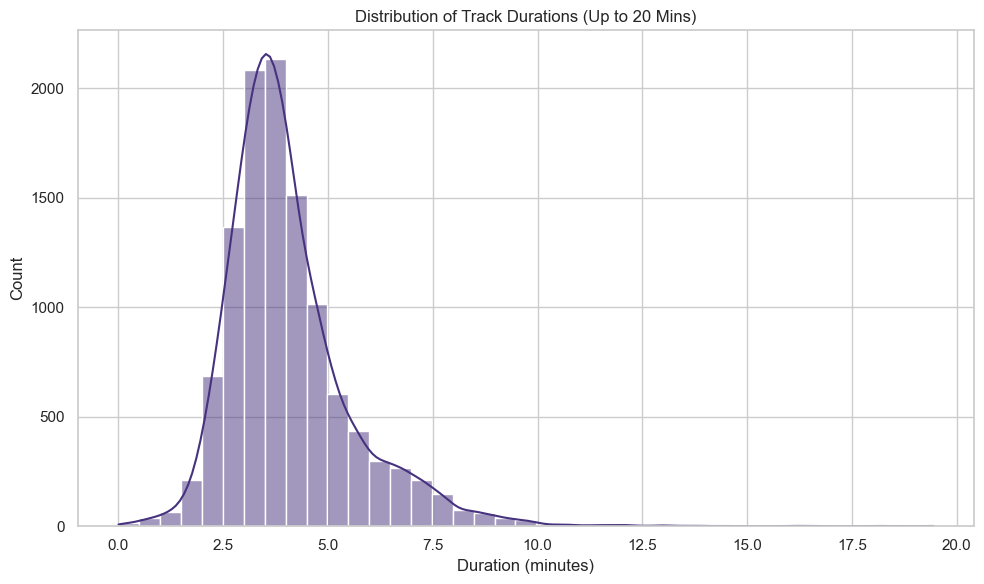


--- Plotting Popularity vs Duration (Filtered) ---


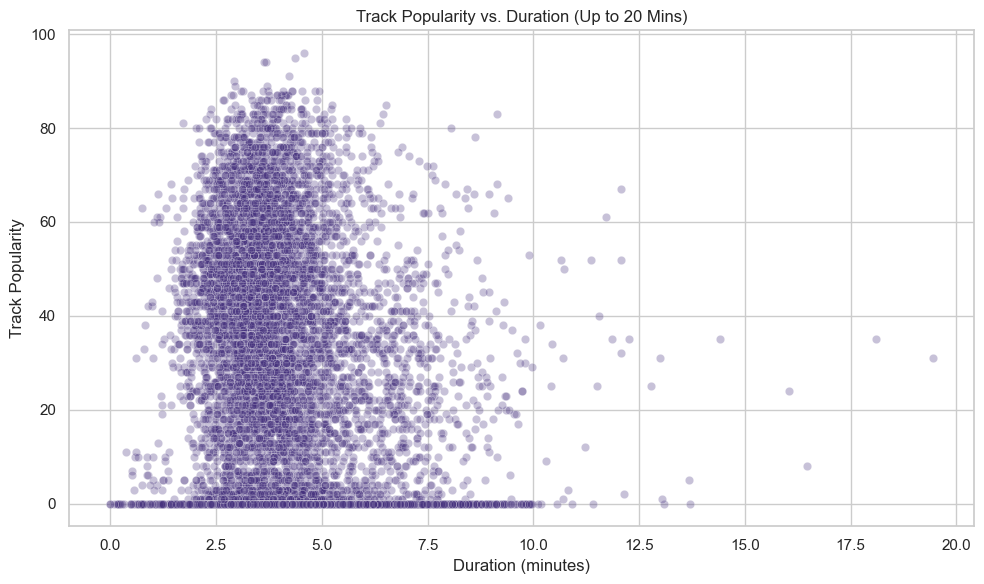


--- Explicit vs Non-Explicit Summary (Unfiltered Data) ---


,explicit,track_count,mean_popularity,mean_artist_popularity,mean_duration_ms,median_popularity,median_artist_popularity,median_duration_ms
0,False,9712,23.138694,53.051654,247452.793657,16.0,55.0,226386.5
1,True,1614,31.946097,66.771036,226083.879802,35.0,68.5,219589.0


In [ ]:
if df is not None:
    # --- Filter for Duration Analysis ---
    MAX_DURATION_MINUTES = 20
    max_duration_ms = MAX_DURATION_MINUTES * 60 * 1000
    print(f"\n--- Filtering data for duration plots (<= {MAX_DURATION_MINUTES} minutes) ---")
    # Create a filtered copy for duration-related plots
    df_duration_filtered = df[df['duration_ms'] <= max_duration_ms].copy()
    print(f"Original track count: {len(df)}, Filtered track count: {len(df_duration_filtered)}")
    # --- End Filter ---

    if not df_duration_filtered.empty:
        print("\n--- Plotting Duration Distribution (Minutes, Filtered) ---")
        # Pass the filtered dataframe to the plotting function
        ax_duration = af.plot_duration_distribution(df_duration_filtered, time_unit='minutes')
        if ax_duration:
            ax_duration.set_title(f"Distribution of Track Durations (Up to {MAX_DURATION_MINUTES} Mins)") # Update title
            plt.show()
        else:
            print("Could not generate duration distribution plot.")

        print("\n--- Plotting Popularity vs Duration (Filtered) ---")
        # Pass the filtered dataframe to the plotting function
        ax_pop_dur = af.plot_feature_vs_popularity(df_duration_filtered, feature='duration_ms', kind='scatter') # Use 'hexbin' for dense plots
        if ax_pop_dur:
             # Title is already updated inside the function based on feature name conversion
             ax_pop_dur.set_title(f"Track Popularity vs. Duration (Up to {MAX_DURATION_MINUTES} Mins)") # Update title
             plt.show()
        else:
            print("Could not generate popularity vs duration plot.")
    else:
        print("No tracks found within the specified duration limit.")


    # Explicit summary is calculated on the original unfiltered dataframe
    print("\n--- Explicit vs Non-Explicit Summary (Unfiltered Data) ---")
    explicit_summary = af.analyze_explicit_tracks_summary(df.copy()) # Uses default cols: popularity, artist_popularity, duration_ms
    if explicit_summary is not None:
        display(explicit_summary)
    else:
        print("Could not generate explicit tracks summary.")

else:
    print("Skipping Track Characteristics Analysis: DataFrame not loaded.")


# 
# ## 8. Top/Bottom Tracks
#
# Identifying the most and least popular tracks in the library based on Spotify's score.



In [10]:
if df is not None:
    print("\n--- Top 10 Most Popular Tracks ---")
    top_tracks = af.get_top_n_items(df.copy(),
                                     display_cols=['track_name', 'artist_names', 'album_name', 'popularity'],
                                     sort_col='popularity', n=10, ascending=False)
    display(top_tracks)

    print("\n--- Bottom 10 Tracks (Least Popular / Newest?) ---")
    bottom_tracks = af.get_top_n_items(df.copy(),
                                     display_cols=['track_name', 'artist_names', 'album_name', 'popularity', 'added_at'],
                                     sort_col='popularity', n=10, ascending=True)
    display(bottom_tracks)


# 
# --- End of Analysis ---


--- Top 10 Most Popular Tracks ---


,track_name,artist_names,album_name,popularity
385,Not Like Us,Kendrick Lamar,Not Like Us,96
284,WILDFLOWER,Billie Eilish,HIT ME HARD AND SOFT,95
281,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",94
207,tv off (feat. lefty gunplay),"Kendrick Lamar, Lefty Gunplay",GNX,94
2138,Every Breath You Take,The Police,Synchronicity (Remastered 2003),91
196,Espresso,Sabrina Carpenter,Short n' Sweet,90
2418,Feel Good Inc.,"Gorillaz, De La Soul",Demon Days,89
6231,HUMBLE.,Kendrick Lamar,DAMN.,89
5415,Pink + White,Frank Ocean,Blonde,88
1690,Mr. Brightside,The Killers,Hot Fuss,88



--- Bottom 10 Tracks (Least Popular / Newest?) ---


,track_name,artist_names,album_name,popularity,added_at
5662,Ramblin' Man,Allman Brothers Band,Brothers And Sisters (Deluxe Edition),0,2017-11-06 17:06:34+00:00
10733,Heart Stopper,Subvert and Datsik,Crazy EP,0,2014-09-05 18:28:35+00:00
6756,Words (feat. Laura Brehm),"Feint, Laura Brehm",Monstercat - Best of 2016,0,2016-12-17 14:57:35+00:00
3336,We Belong Dead,Slash,Universal Monsters Maze Soundtrack/Halloween H...,0,2019-09-24 20:51:26+00:00
3335,Monster,The Automatic,Monster,0,2019-09-24 20:55:20+00:00
3334,Children of the Grave,Black Sabbath,Master Of Reality (Remastered),0,2019-09-24 23:25:58+00:00
3333,Feed My Frankenstein,Alice Cooper,Playlist: The Very Best Of Alice Cooper,0,2019-09-24 23:35:03+00:00
6755,Checkpoint,"Nitro Fun, Hyper Potions",Monstercat - Best of 2016,0,2016-12-17 14:57:35+00:00
3332,Shout At The Devil,Mötley Crüe,The Greatest Hits,0,2019-09-24 23:45:25+00:00
6758,Cold Skin,"Seven Lions, Echos",Monstercat - Best of 2016,0,2016-12-17 14:57:35+00:00


# 
# ## 9. Deeper Time-Based Analysis

# 
# ### 9.1 Genre Representation Over Time Added
# Analyzing how the genres of tracks added to the library have changed yearly.




--- Analyzing Genre Representation Over Time Added ---


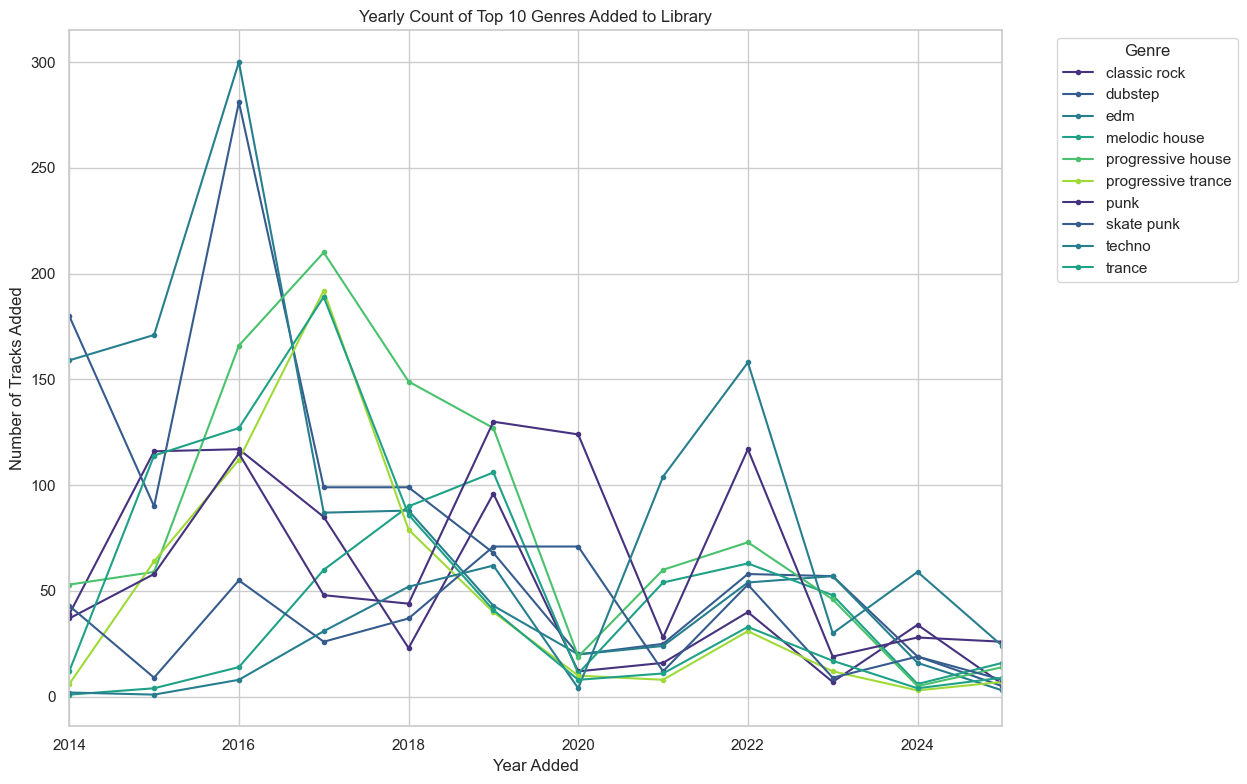

In [11]:
if df is not None and 'added_at' in df.columns and 'artist_genres' in df.columns:
    print("\n--- Analyzing Genre Representation Over Time Added ---")
    try:
        # Ensure added_at is datetime and set as index
        df_time = df.copy()
        if not pd.api.types.is_datetime64_any_dtype(df_time['added_at']):
             df_time['added_at'] = pd.to_datetime(df_time['added_at'], errors='coerce', utc=True)
        df_time = df_time.dropna(subset=['added_at'])
        df_time = df_time.set_index('added_at')

        # Explode genres first
        exploded_genres_time = af._explode_genres(df_time.reset_index()) # Use helper, reset index to keep added_at
        if not exploded_genres_time.empty:
            # Get Top N genres overall to focus on
            top_overall_genres = af._get_top_genres(exploded_genres_time, n=10)

            if top_overall_genres:
                # Filter for top genres and resample
                genre_time_series = exploded_genres_time[exploded_genres_time['genre'].isin(top_overall_genres)]
                # Group by year and genre, count, then unstack
                genre_trends = genre_time_series.set_index('added_at').groupby(pd.Grouper(freq='YE'))['genre'].value_counts().unstack(fill_value=0)

                # Optional: Calculate proportions instead of counts
                # genre_trends_prop = genre_trends.apply(lambda x: x / x.sum(), axis=1)

                # Plotting
                plt.figure(figsize=(15, 8))
                ax_genre_trend = genre_trends.plot(kind='line', marker='.', ax=plt.gca()) # Use plt.gca() to get current axes
                ax_genre_trend.set_title(f'Yearly Count of Top {len(top_overall_genres)} Genres Added to Library')
                ax_genre_trend.set_ylabel('Number of Tracks Added')
                ax_genre_trend.set_xlabel('Year Added')
                ax_genre_trend.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
                plt.show()
            else:
                print("Could not determine overall top genres.")
        else:
            print("No valid genre data after exploding.")

    except Exception as e:
        print(f"An error occurred during genre trend analysis: {e}")
else:
    print("Skipping Genre Representation Over Time: DataFrame not loaded or required columns missing.")



# 
# ### 9.2 Average Popularity of Added Tracks Over Time




--- Analyzing Average Popularity of Added Tracks Over Time ---


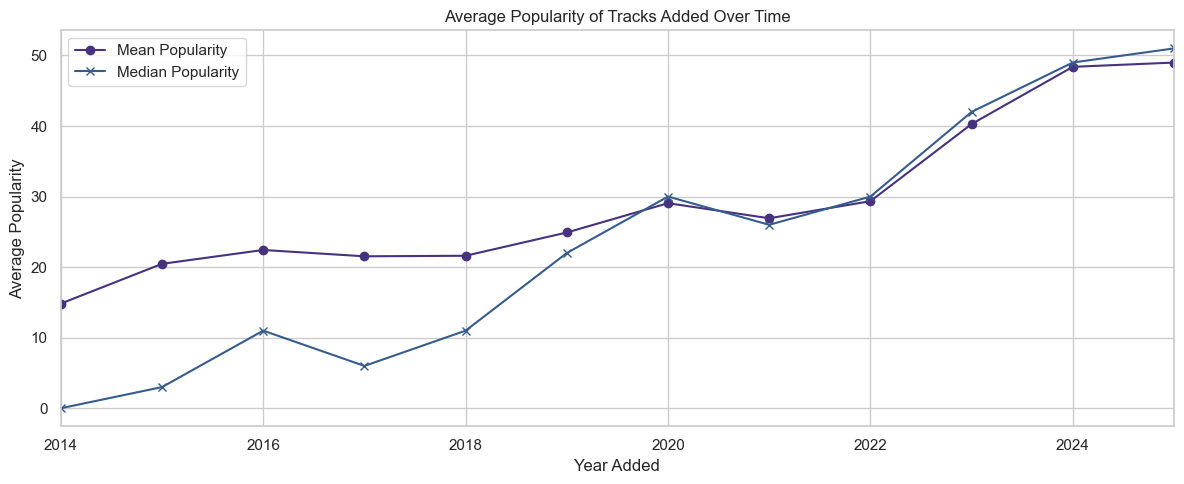

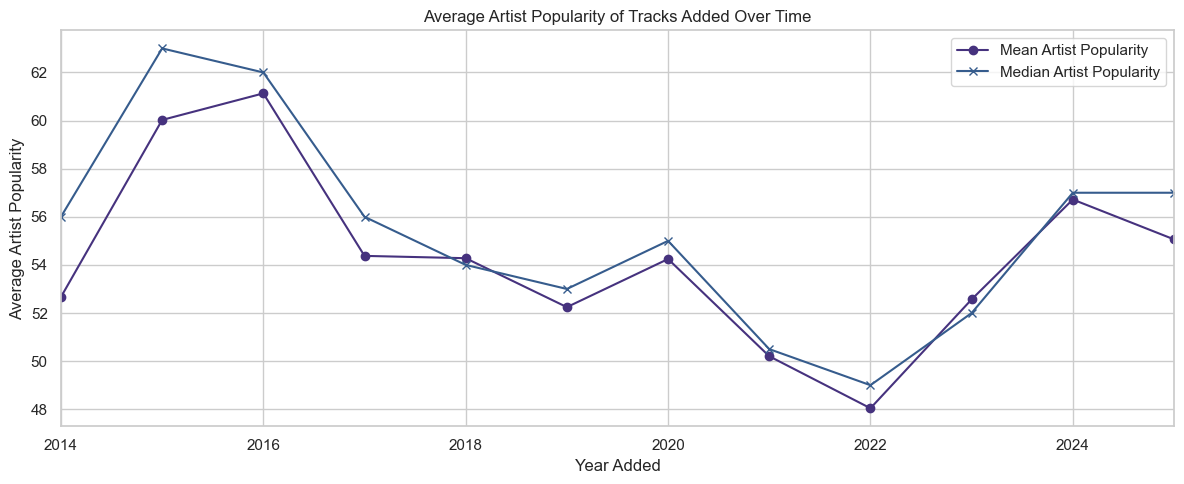

In [12]:

if df is not None and 'added_at' in df.columns:
    print("\n--- Analyzing Average Popularity of Added Tracks Over Time ---")
    try:
        df_time_pop = df.copy()
        # Ensure added_at is datetime
        if not pd.api.types.is_datetime64_any_dtype(df_time_pop['added_at']):
             df_time_pop['added_at'] = pd.to_datetime(df_time_pop['added_at'], errors='coerce', utc=True)

        df_time_pop = df_time_pop.set_index('added_at')

        features_to_plot = ['popularity']
        if 'artist_popularity' in df_time_pop.columns:
            features_to_plot.append('artist_popularity')

        for feature in features_to_plot:
             if pd.api.types.is_numeric_dtype(df_time_pop[feature]):
                # Resample yearly and calculate mean/median
                pop_trend_mean = df_time_pop[feature].resample('YE').mean()
                pop_trend_median = df_time_pop[feature].resample('YE').median()

                plt.figure(figsize=(12, 5))
                ax = pop_trend_mean.plot(label=f'Mean {feature.replace("_", " ").title()}', marker='o')
                pop_trend_median.plot(label=f'Median {feature.replace("_", " ").title()}', marker='x', ax=ax)
                ax.set_title(f'Average {feature.replace("_", " ").title()} of Tracks Added Over Time')
                ax.set_ylabel(f'Average {feature.replace("_", " ").title()}')
                ax.set_xlabel('Year Added')
                ax.legend()
                plt.show()
             else:
                 print(f"Skipping trend for '{feature}': Not a numeric column.")

    except Exception as e:
        print(f"An error occurred during popularity trend analysis: {e}")
else:
    print("Skipping Average Popularity Over Time: DataFrame not loaded or 'added_at' missing.")


# 
# ## 10. Deeper Genre/Artist/Album Analysis

# 
# ### 10.1 Artist Genre Specialization/Diversity




--- Analyzing Artist Genre Diversity ---

Artists by Number of Unique Genres Represented in Library (Top 20):


,artist_name,unique_genre_count
artist_id,,
"2yQf6b8hxahZaT5dHlWaB1, 0ONHkAv9pCAFxb0zJwDNTy, 2GHclqNVjqGuiE5mA7BEoc, 17lzZA2AlOHwCwFALHttmp, 18HVMQsV3tINaTyzT5UIjH, 0fA0VVWsXO9YnASrzqfmYu, 5RCdjio4ASMQ8CFaSuAl6C","Raekwon, Pusha T, Common, 2 Chainz, CyHi, Kid ...",13
"0AfNNw1LS2i9KW4icd7inD, 4dae5ONh5OK2K5ihXwGUt1, 1TUXttKjP2lfz1WzSqlrcM, 3ifxHfYz2pqHku0bwx8H5J","Fred Falke, Elohim, Mansions On The Moon, Amtrac",11
"5FKchcZpQOkqFvXBj1aCvb, 37PZXblQTqpEWGdjctNcGP, 3QryVD03gGZOLQQXjy3EoA, 4FXGRMSHh2JjHxVwS8dhH1","Excision, Space Laces, Getter, Virtual Riot",11
"5R3Hr2cnCCjt220Jmt2xLf, 14Tg9FvbNismPR1PJHxRau, 3Qy1IxDSU8SLpUUOfbOpxM, 0ycHhPwPvoaO4VGzmMnXGq","Dillon Francis, Sultan + Shepard, The Chain Ga...",11
"1HxJeLhIuegM3KgvPn8sTa, 5he5w2lnU9x7JFhnwcekXX, 5fMUXHkw8R8eOP2RNVYEZX, 2yT7X3Gg2S51DHz67FAYL6, 2xSkGZBEbUVJ8z1E0d0pzB","Jack Ü, Skrillex, Diplo, SNAILS, Taranchyla",10
"2uGNBmaWvxF6HAcWuhK7OP, 7muzHifhMdnfN1xncRLOqk, 3UCbp6D1lvILlxRJT9LnFa","Cookie Monsta, Flux Pavilion, Koven",9
"7A0awCXkE1FtSU8B0qwOJQ, 50co4Is1HCEo8bhOyUWKpn, 62DmErcU7dqZbJaDqwsqzR","Jamie xx, Young Thug, Popcaan",9
"0lLY20XpZ9yDobkbHI7u1y, 3V1h3kAdiVDBiwlY2i6dJz","Pegboard Nerds, 12th Planet",9
"6fcTRFpz0yH79qSKfof7lp, 6CCTvLyIHqUhY6VQizt150, 0t3yoCFCow8O6LiUloM9cq, 3VEqFWRt47xQAZJMBF3duQ","Seven Lions, Jason Ross, Paul Meany, Grum",9


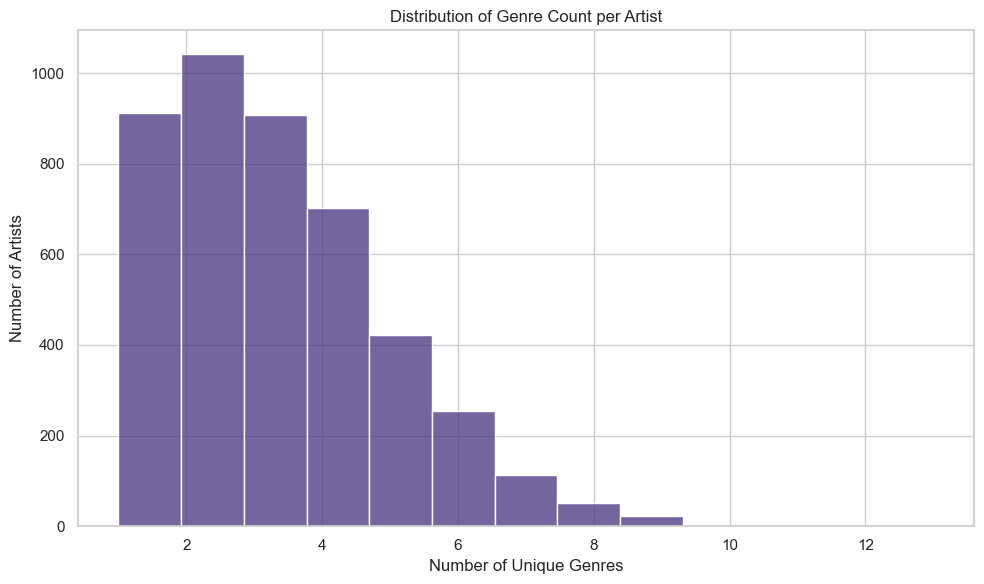

In [ ]:
# Use the correct column name 'artist_ids' in the initial check
if df is not None and 'artist_ids' in df.columns and 'artist_names' in df.columns and 'artist_genres' in df.columns:
    print("\n--- Analyzing Artist Genre Diversity ---") # Keep section header
    try:
        # Call the helper function to explode genres
        exploded_genres_artists = af._explode_genres(df.copy())

        # Check if necessary columns exist after exploding
        required_cols = ['artist_ids', 'artist_names', 'genre']
        required_cols_exist = all(c in exploded_genres_artists.columns for c in required_cols)

        if exploded_genres_artists is not None and not exploded_genres_artists.empty and required_cols_exist:
            # Clean grouping keys (artist ID and genre) before grouping
            exploded_genres_artists_clean = exploded_genres_artists.dropna(subset=['artist_ids', 'genre'])
            exploded_genres_artists_clean = exploded_genres_artists_clean[
                (exploded_genres_artists_clean['artist_ids'].astype(str) != '') &
                (exploded_genres_artists_clean['genre'].astype(str) != '')
            ]

            if not exploded_genres_artists_clean.empty:
                # Group by artist, count unique genres
                artist_genre_counts = exploded_genres_artists_clean.groupby('artist_ids').agg(
                    artist_name=('artist_names', 'first'), # Get primary name
                    unique_genre_count=('genre', 'nunique')
                ).sort_values('unique_genre_count', ascending=False)

                print("\nArtists by Number of Unique Genres Represented in Library (Top 20):")
                artist_genre_counts.index.name = 'artist_id' # Rename index for clarity
                display(artist_genre_counts.head(20)) # Show top 20 most diverse

                # Plot distribution of genre counts
                if not artist_genre_counts.empty:
                    plt.figure(figsize=(10, 6))
                    max_genres = int(artist_genre_counts['unique_genre_count'].max()) if pd.notna(artist_genre_counts['unique_genre_count'].max()) else 1
                    nbins = max(1, max_genres)
                    bin_param = nbins if nbins < 50 else None # Use auto bins if too many

                    # Plot histogram
                    ax_genre_div = sns.histplot(artist_genre_counts['unique_genre_count'], bins=bin_param, kde=False)

                    ax_genre_div.set_title('Distribution of Genre Count per Artist')
                    ax_genre_div.set_xlabel('Number of Unique Genres')
                    ax_genre_div.set_ylabel('Number of Artists')
                    if nbins < 50 : # Set integer ticks if bins are discrete and not too many
                         ax_genre_div.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
                    plt.show()
                else:
                     print("No artist genre counts to plot.") # Keep important warnings
            else:
                 print("No data remaining after cleaning artist_id/genre NAs/blanks.") # Keep important warnings
        else:
            print("No valid genre data after exploding or required columns missing in exploded data.") # Keep important warnings
    except Exception as e:
        # Keep error reporting
        print(f"An error occurred during artist genre diversity analysis: {e}")
        # import traceback # Optionally comment out traceback in final version if too verbose
        # traceback.print_exc()
else:
    # Keep message indicating why section was skipped
    print("Skipping Artist Genre Diversity: DataFrame not loaded or required columns ('artist_ids', 'artist_names', 'artist_genres') missing.")

# 
# ### 10.2 Top Genres for Top Artists




--- Analyzing Top Genres for Top Artists ---

Top 10 Artists by Track Count (IDs):


,artist_ids,track_count
0,5K4W6rqBFWDnAN6FQUkS6x,151
1,2CIMQHirSU0MQqyYHq0eOx,144
2,6kACVPfCOnqzgfEF5ryl0x,105
3,2YZyLoL8N0Wb9xBt1NhZWg,100
4,3RGLhK1IP9jnYFH4BRFJBS,94
5,4aKdmOXdUKX07HVd3sGgzw,81
6,6FBDaR13swtiWwGhX1WQsP,73
7,0epOFNiUfyON9EYx7Tpr6V,67
8,10gzBoINW3cLJfZUka8Zoe,66
9,3TVXtAsR1Inumwj472S9r4,64



--- Plotting Genre Distribution for Tracks by Top 10 Artists ---


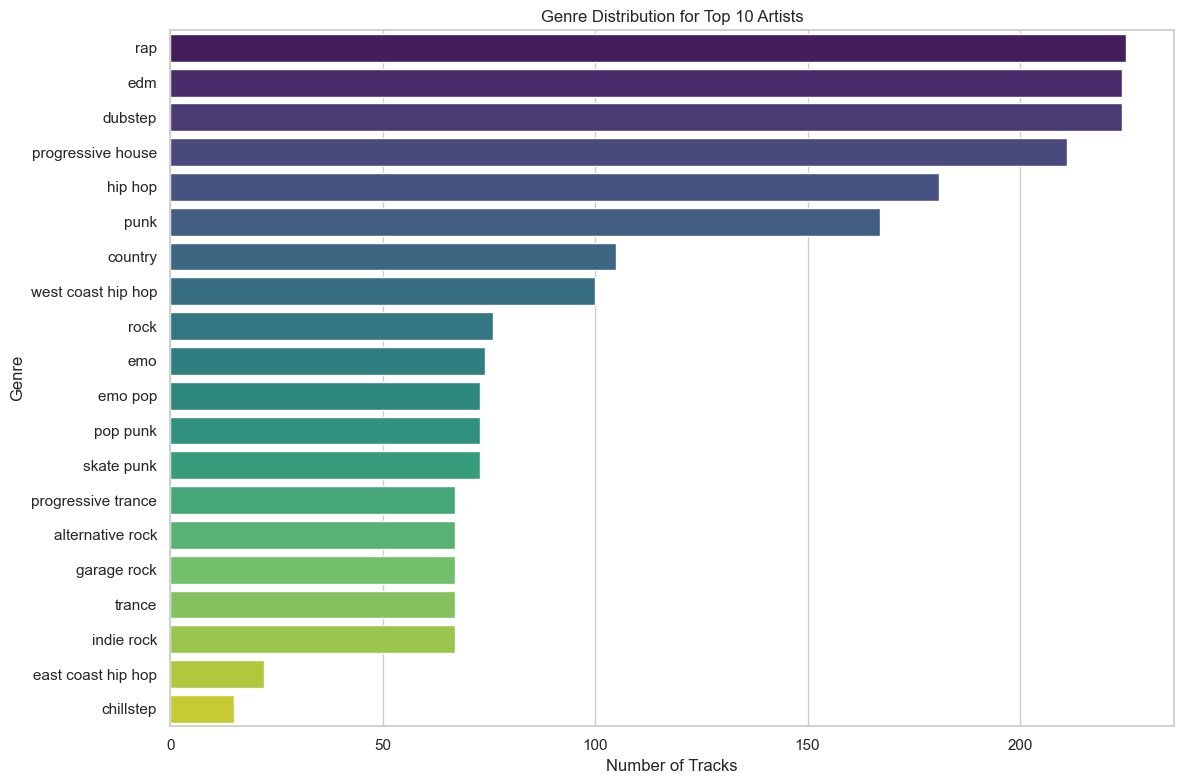

In [ ]:
if df is not None and 'artist_ids' in df.columns and 'artist_genres' in df.columns:
    print("\n--- Analyzing Top Genres for Top Artists ---") # Keep section header
    N_TOP_ARTISTS = 10 # Define how many top artists to consider
    try:
        # Call the function to get top artists (IDs and track counts)
        top_artists_df = af.get_top_n_artists(df.copy(), n=N_TOP_ARTISTS)

        if top_artists_df is not None and not top_artists_df.empty:
            # Get the list of IDs from the 'artist_ids' column
            top_artist_ids = top_artists_df['artist_ids'].tolist()

            # Display the returned DataFrame (IDs and Counts)
            print(f"\nTop {len(top_artist_ids)} Artists by Track Count (IDs):") # Keep header for table
            display(top_artists_df)

            # Define filter function (can be kept internal)
            def check_top_artist(ids_str):
                if pd.isna(ids_str): return False
                track_artist_ids = {s.strip() for s in ids_str.split(',')}
                return not track_artist_ids.isdisjoint(set(top_artist_ids))

            # Apply the check function to filter the main DataFrame
            df_filtered_top_artists = df[df['artist_ids'].apply(check_top_artist)].copy()

            if not df_filtered_top_artists.empty:
                # Plot the genre distribution for the filtered tracks
                print(f"\n--- Plotting Genre Distribution for Tracks by Top {N_TOP_ARTISTS} Artists ---") # Keep header for plot
                if 'artist_genres' in df_filtered_top_artists.columns:
                    ax_top_artist_genres = af.plot_genre_distribution(df_filtered_top_artists, top_n=20)
                    if ax_top_artist_genres:
                        ax_top_artist_genres.set_title(f'Genre Distribution for Top {N_TOP_ARTISTS} Artists')
                        plt.show() # Display the plot
                    else:
                        # Keep warnings
                        print(f"Could not generate genre distribution plot for top {N_TOP_ARTISTS} artists (plot function returned None).")
                else:
                     # Keep warnings
                    print("Filtered DataFrame is missing 'artist_genres' column.")
            else:
                 # Keep warnings
                 print(f"No tracks found matching the top {N_TOP_ARTISTS} artists after filtering.")
        else:
             # Keep warnings
            print("Could not retrieve top artists (get_top_n_artists returned None or empty).")
    except Exception as e:
         # Keep error reporting
         print(f"An unexpected error occurred during top genres for top artists analysis: {e}")
         # import traceback # Optionally comment out for cleaner output
         # traceback.print_exc()
else:
    # Keep message indicating why section was skipped
    print("Skipping Top Genres for Top Artists: DataFrame not loaded or required columns ('artist_ids', 'artist_genres') missing.")

# 
# ### 10.3 Album Type Analysis




--- Analyzing Album Type Distribution ---


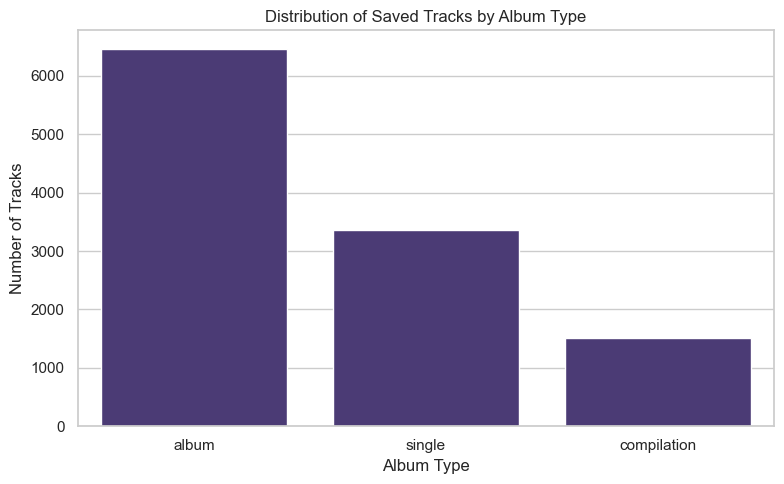

<Figure size 1200x600 with 0 Axes>

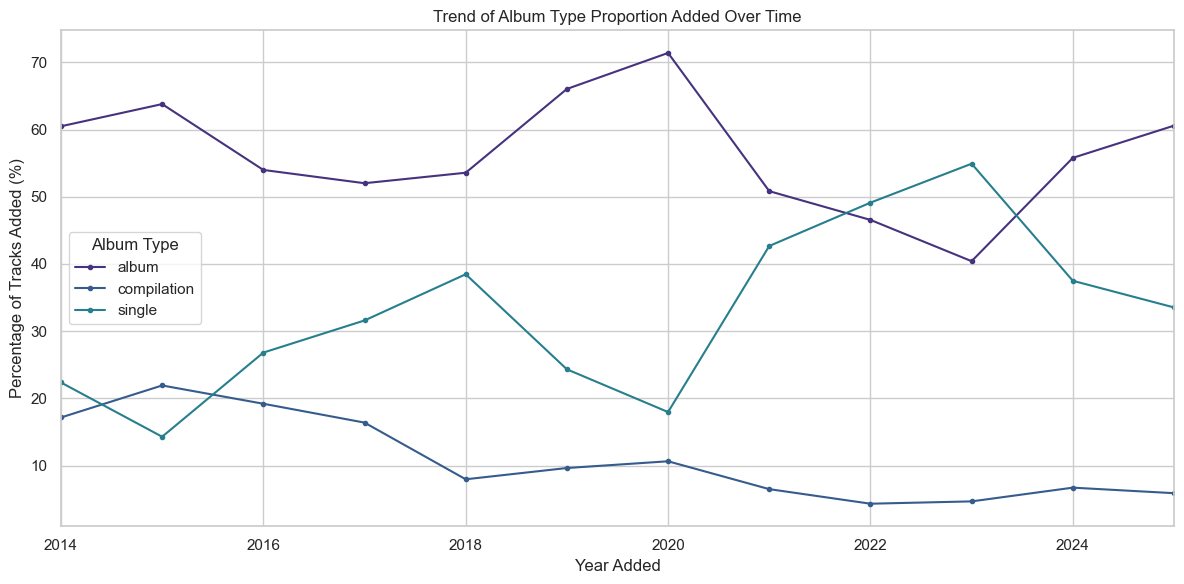

In [15]:
if df is not None and 'album_type' in df.columns:
    print("\n--- Analyzing Album Type Distribution ---")
    try:
        plt.figure(figsize=(8, 5))
        album_type_counts = df['album_type'].value_counts()
        ax_album_type = sns.barplot(x=album_type_counts.index, y=album_type_counts.values)
        ax_album_type.set_title('Distribution of Saved Tracks by Album Type')
        ax_album_type.set_ylabel('Number of Tracks')
        ax_album_type.set_xlabel('Album Type')
        plt.show()

        # Trend over time added
        if 'added_at' in df.columns:
            df_at = df.copy()
            if not pd.api.types.is_datetime64_any_dtype(df_at['added_at']):
                df_at['added_at'] = pd.to_datetime(df_at['added_at'], errors='coerce', utc=True)
            df_at = df_at.set_index('added_at')
            album_type_trend = df_at.groupby(pd.Grouper(freq='YE'))['album_type'].value_counts(normalize=True).unstack(fill_value=0) * 100

            plt.figure(figsize=(12, 6))
            ax_trend = album_type_trend.plot(kind='line', marker='.')
            ax_trend.set_title('Trend of Album Type Proportion Added Over Time')
            ax_trend.set_ylabel('Percentage of Tracks Added (%)')
            ax_trend.set_xlabel('Year Added')
            ax_trend.legend(title='Album Type')
            plt.show()

    except Exception as e:
         print(f"An error occurred during album type analysis: {e}")

else:
    print("Skipping Album Type Analysis: DataFrame not loaded or 'album_type' missing.")


# 
# ### 10.4 Top Albums by Average Popularity



In [16]:
if df is not None and 'album_id' in df.columns and 'album_name' in df.columns and 'popularity' in df.columns:
    print("\n--- Analyzing Top Albums by Average Track Popularity ---")
    MIN_TRACKS_PER_ALBUM = 3 # Optional: Minimum tracks saved from an album to consider it
    try:
        df_alb_pop = df[['album_id', 'album_name', 'popularity']].copy()
        df_alb_pop['popularity'] = pd.to_numeric(df_alb_pop['popularity'], errors='coerce')
        df_alb_pop = df_alb_pop.dropna()

        album_stats = df_alb_pop.groupby(['album_id', 'album_name']).agg(
            avg_popularity=('popularity', 'mean'),
            track_count=('popularity', 'size')
        )

        # Filter for albums with minimum number of tracks
        if MIN_TRACKS_PER_ALBUM > 1:
            album_stats_filtered = album_stats[album_stats['track_count'] >= MIN_TRACKS_PER_ALBUM]
            print(f"(Considering albums with at least {MIN_TRACKS_PER_ALBUM} saved tracks)")
        else:
            album_stats_filtered = album_stats

        top_albums_by_pop = album_stats_filtered.sort_values('avg_popularity', ascending=False).head(15) # Top 15

        print("\nTop 15 Albums by Average Track Popularity:")
        display(top_albums_by_pop)

    except Exception as e:
        print(f"An error occurred during top albums by popularity analysis: {e}")
else:
    print("Skipping Top Albums by Average Popularity: DataFrame not loaded or required columns missing.")


--- Analyzing Top Albums by Average Track Popularity ---
(Considering albums with at least 3 saved tracks)

Top 15 Albums by Average Track Popularity:


,,avg_popularity,track_count
album_id,album_name,,
0bUTHlWbkSQysoM3VsWldT,Demon Days,81.666667,3
2tlTBLz2w52rpGCLBGyGw6,Minutes to Midnight,80.0,3
2RNTBrSO8U8XjjEj9RVvZ5,Americana,78.666667,3
0BwWUstDMUbgq2NYONRqlu,Rumours (Super Deluxe),77.75,4
0ETFjACtuP2ADo6LFhL6HN,Abbey Road (Remastered),77.0,3
392p3shh2jkxUxY2VHvlH8,channel ORANGE,77.0,4
7ycBtnsMtyVbbwTfJwRjSP,To Pimp A Butterfly,76.0,3
0FZK97MXMm5mUQ8mtudjuK,The Black Parade,75.666667,3
6mUdeDZCsExyJLMdAfDuwh,Back In Black,75.0,3


# 
# ## 11. Investigating Outliers and Specific Characteristics

# 
# ### 11.1 Analysis of Add/Release Lag Outliers




--- Analyzing Add vs. Release Lag Outliers ---
Defining lag outliers as > 3650 days.
Found 2525 outlier tracks and 7730 non-outlier tracks.


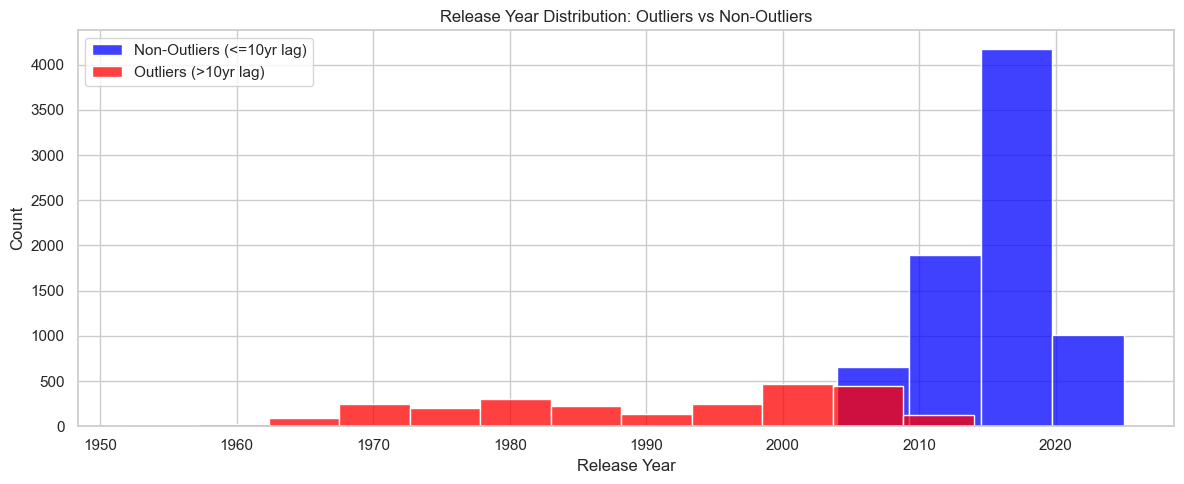

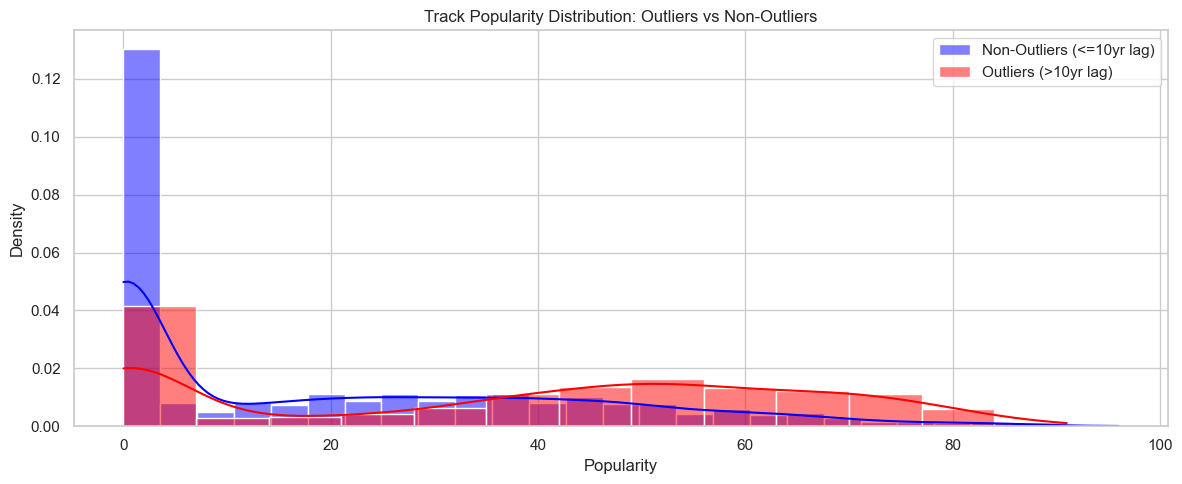


--- Comparing Top Genres ---
Top 10 Genre Comparison (% representation within group):


,Outliers (> 3650 days) %,Non-Outliers (<= 3650 days) %
genre,,
edm,0.000000,5.351926
progressive house,0.000000,5.175550
dubstep,0.000000,5.147991
trance,0.000000,3.527531
progressive trance,0.000000,3.064543
techno,0.000000,2.904702
melodic house,0.000000,2.585019
melodic techno,0.000000,2.226754
tech house,0.000000,2.061401


In [17]:
if df is not None:
    print("\n--- Analyzing Add vs. Release Lag Outliers ---")
    try:
        lag_series = af.calculate_add_vs_release_lag(df.copy(), time_unit='days')

        if lag_series is not None:
            df_with_lag = df.copy()
            df_with_lag['add_release_lag_days'] = lag_series
            df_with_lag = df_with_lag.dropna(subset=['add_release_lag_days']) # Drop rows where lag couldn't be calculated

            # Define outlier threshold (e.g., 95th percentile or > 10 years)
            # threshold_lag = df_with_lag['add_release_lag_days'].quantile(0.95)
            threshold_lag = 10 * 365 # Example: More than 10 years lag
            print(f"Defining lag outliers as > {threshold_lag} days.")

            df_outliers = df_with_lag[df_with_lag['add_release_lag_days'] > threshold_lag]
            df_non_outliers = df_with_lag[df_with_lag['add_release_lag_days'] <= threshold_lag]

            print(f"Found {len(df_outliers)} outlier tracks and {len(df_non_outliers)} non-outlier tracks.")

            if not df_outliers.empty and not df_non_outliers.empty:
                # Compare Release Year Distribution
                plt.figure(figsize=(12, 5))
                sns.histplot(df_non_outliers['release_year'].dropna(), color='blue', label='Non-Outliers (<=10yr lag)', kde=False, binwidth=5)
                sns.histplot(df_outliers['release_year'].dropna(), color='red', label='Outliers (>10yr lag)', kde=False, binwidth=5)
                plt.title('Release Year Distribution: Outliers vs Non-Outliers')
                plt.xlabel('Release Year')
                plt.legend()
                plt.show()

                # Compare Popularity Distribution
                plt.figure(figsize=(12, 5))
                sns.histplot(df_non_outliers['popularity'].dropna(), color='blue', label='Non-Outliers (<=10yr lag)', kde=True, stat="density")
                sns.histplot(df_outliers['popularity'].dropna(), color='red', label='Outliers (>10yr lag)', kde=True, stat="density")
                plt.title('Track Popularity Distribution: Outliers vs Non-Outliers')
                plt.xlabel('Popularity')
                plt.legend()
                plt.show()

                # Compare Top Genres (Need function that returns counts/proportions or modify plotting)
                print("\n--- Comparing Top Genres ---")
                top_n = 10
                genres_outliers = af._explode_genres(df_outliers)['genre'].value_counts(normalize=True).head(top_n) * 100
                genres_non_outliers = af._explode_genres(df_non_outliers)['genre'].value_counts(normalize=True).head(top_n) * 100

                comparison_df = pd.DataFrame({
                    f'Outliers (> {threshold_lag} days) %': genres_outliers,
                    f'Non-Outliers (<= {threshold_lag} days) %': genres_non_outliers
                }).fillna(0).sort_values(f'Non-Outliers (<= {threshold_lag} days) %', ascending=False) # Sort by non-outlier frequency

                print(f"Top {top_n} Genre Comparison (% representation within group):")
                display(comparison_df)

            else:
                print("Not enough data in outlier or non-outlier groups to compare.")
        else:
            print("Could not calculate lag series for outlier analysis.")
    except Exception as e:
        print(f"An error occurred during lag outlier analysis: {e}")
else:
    print("Skipping Lag Outlier Analysis: DataFrame not loaded.")




# 
# ## 12. Time Series: Seasonality / Periodicity Analysis




--- Analyzing Seasonality of Track Additions ---


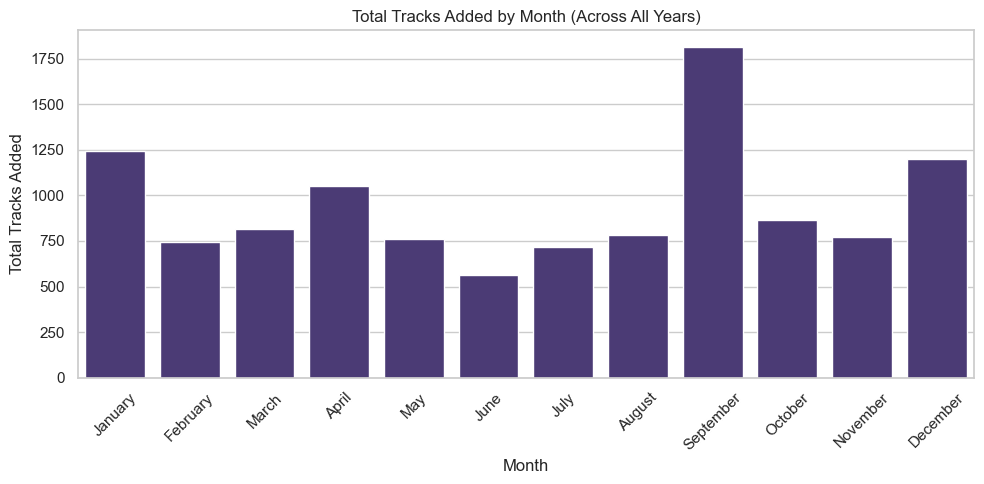

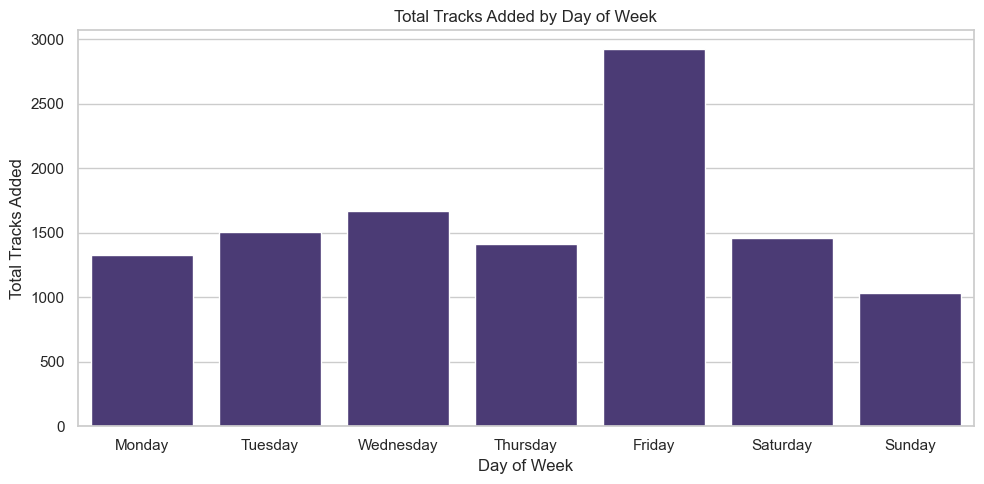

In [18]:
if df is not None and 'added_at' in df.columns:
    print("\n--- Analyzing Seasonality of Track Additions ---")
    df_ts = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_ts['added_at']):
        df_ts['added_at'] = pd.to_datetime(df_ts['added_at'], errors='coerce', utc=True)
    df_ts = df_ts.dropna(subset=['added_at'])

    # Monthly Seasonality
    monthly_adds = df_ts.groupby(df_ts['added_at'].dt.month).size()
    monthly_adds.index = pd.to_datetime(monthly_adds.index, format='%m').strftime('%B') # Format index as Month Name

    plt.figure(figsize=(10, 5))
    ax_month = sns.barplot(x=monthly_adds.index, y=monthly_adds.values, order=pd.date_range(start='2024-01-01', periods=12, freq='ME').strftime('%B'))
    ax_month.set_title('Total Tracks Added by Month (Across All Years)')
    ax_month.set_xlabel('Month')
    ax_month.set_ylabel('Total Tracks Added')
    plt.xticks(rotation=45)
    plt.show()

    # Day of Week Seasonality
    dayofweek_adds = df_ts.groupby(df_ts['added_at'].dt.dayofweek).size()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dayofweek_adds.index = dayofweek_adds.index.map(lambda x: day_names[x])

    plt.figure(figsize=(10, 5))
    ax_dow = sns.barplot(x=dayofweek_adds.index, y=dayofweek_adds.values, order=day_names)
    ax_dow.set_title('Total Tracks Added by Day of Week')
    ax_dow.set_xlabel('Day of Week')
    ax_dow.set_ylabel('Total Tracks Added')
    plt.show()

else:
    print("Skipping Seasonality Analysis: DataFrame not loaded or 'added_at' missing.")

# 
# ## 13. Time Series: Rolling Statistics




--- Analyzing Rolling Average of Tracks Added ---


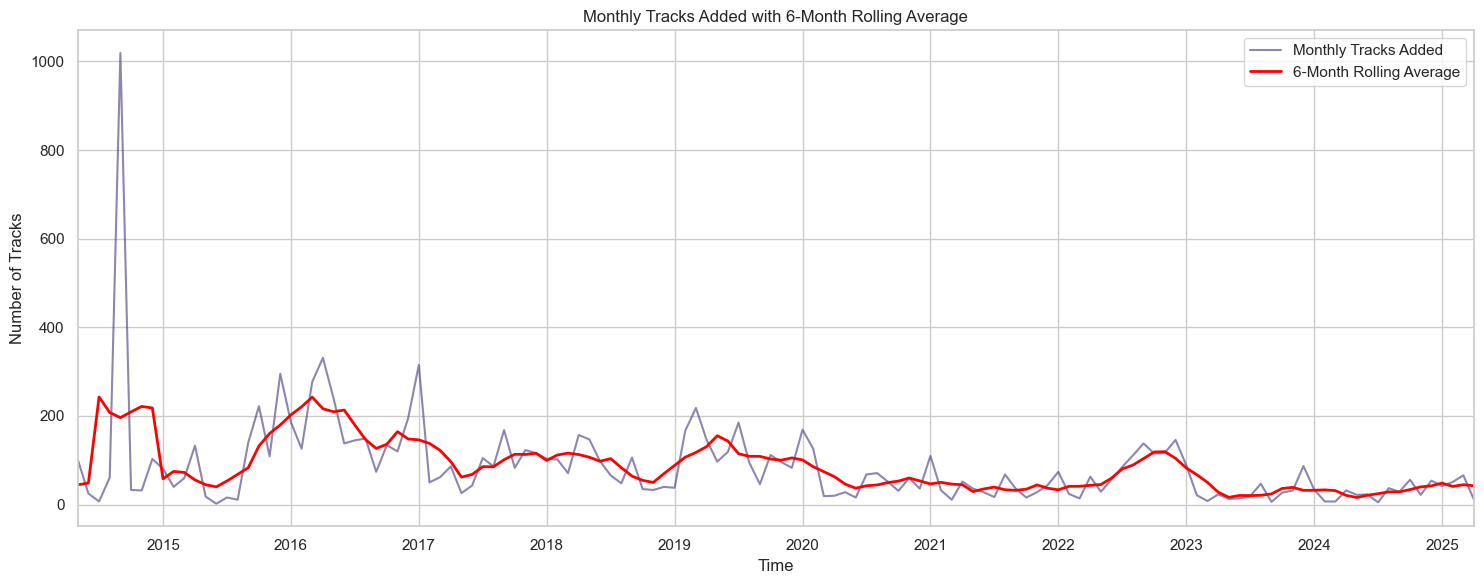

In [19]:
if df is not None and 'added_at' in df.columns:
    print("\n--- Analyzing Rolling Average of Tracks Added ---")
    df_ts = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_ts['added_at']):
        df_ts['added_at'] = pd.to_datetime(df_ts['added_at'], errors='coerce', utc=True)
    df_ts = df_ts.dropna(subset=['added_at']).set_index('added_at')

    # Example: Monthly counts and 6-month rolling average
    monthly_counts = df_ts.resample('ME').size()
    rolling_avg_6m = monthly_counts.rolling(window=6, center=True, min_periods=1).mean() # Center=True looks forward and backward

    plt.figure(figsize=(15, 6))
    ax_roll = monthly_counts.plot(label='Monthly Tracks Added', alpha=0.6)
    rolling_avg_6m.plot(label='6-Month Rolling Average', ax=ax_roll, color='red', linewidth=2)
    ax_roll.set_title('Monthly Tracks Added with 6-Month Rolling Average')
    ax_roll.set_xlabel('Time')
    ax_roll.set_ylabel('Number of Tracks')
    ax_roll.legend()
    plt.show()

else:
    print("Skipping Rolling Stats Analysis: DataFrame not loaded or 'added_at' missing.")

# 
# ### 11.2 Explicit Track Trends




--- Analyzing Explicit Track Trends ---


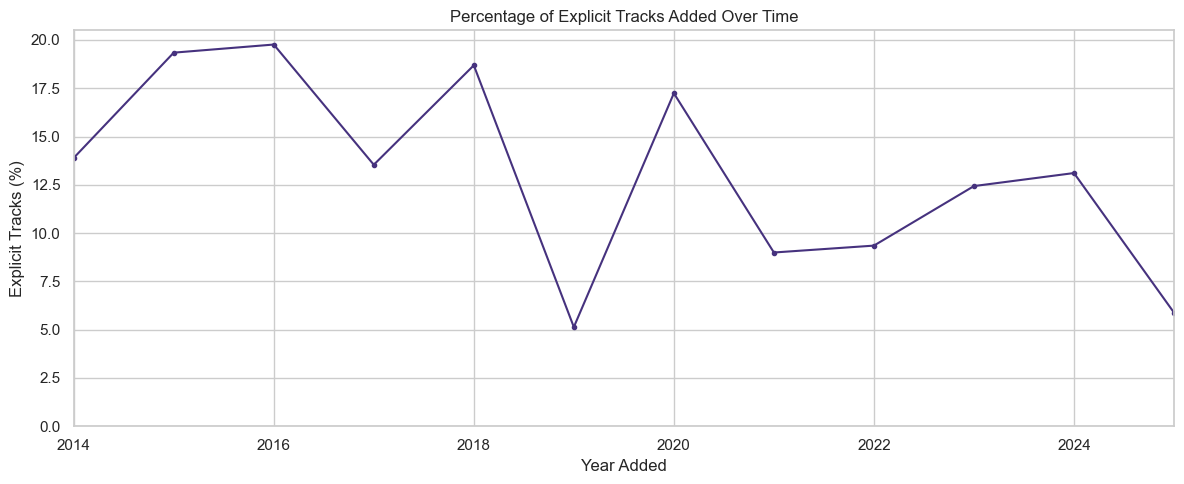

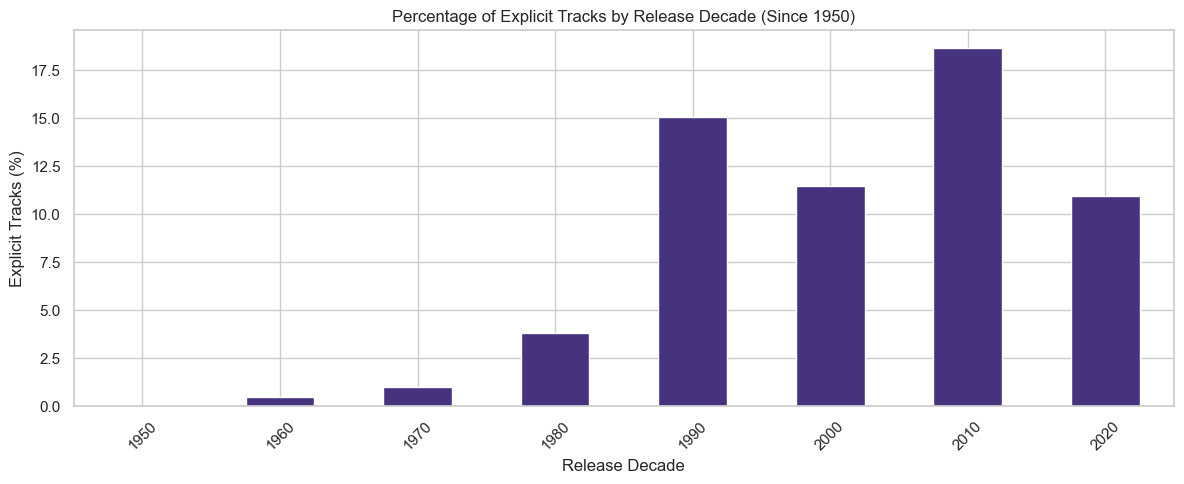

In [20]:
if df is not None and 'explicit' in df.columns:
    print("\n--- Analyzing Explicit Track Trends ---")
    try:
        df_exp = df.copy()
        # Ensure explicit is numeric (0/1) or boolean
        if not (pd.api.types.is_bool_dtype(df_exp['explicit']) or pd.api.types.is_numeric_dtype(df_exp['explicit'])):
            df_exp['explicit'] = df_exp['explicit'].map({'true': 1, 'false': 0, True: 1, False: 0, 1:1, 0:0}).fillna(0)

        # Trend over time added
        if 'added_at' in df_exp.columns:
            df_exp_at = df_exp.copy()
            if not pd.api.types.is_datetime64_any_dtype(df_exp_at['added_at']):
                df_exp_at['added_at'] = pd.to_datetime(df_exp_at['added_at'], errors='coerce', utc=True)
            df_exp_at = df_exp_at.set_index('added_at')
            explicit_add_trend = df_exp_at['explicit'].resample('YE').mean() * 100

            plt.figure(figsize=(12, 5))
            ax_add = explicit_add_trend.plot(marker='.')
            ax_add.set_title('Percentage of Explicit Tracks Added Over Time')
            ax_add.set_ylabel('Explicit Tracks (%)')
            ax_add.set_xlabel('Year Added')
            ax_add.set_ylim(bottom=0) # Percentage starts at 0
            plt.show()

        # Trend over release year (decade)
        if 'release_year' in df_exp.columns or 'album_release_date' in df_exp.columns:
             df_exp_ry = af._parse_release_date(df_exp) # Use helper to ensure columns exist
             df_exp_ry = df_exp_ry.dropna(subset=['release_year'])
             if not df_exp_ry.empty:
                 df_exp_ry['release_decade'] = (df_exp_ry['release_year'] // 10 * 10).astype(int)
                 explicit_release_trend = df_exp_ry.groupby('release_decade')['explicit'].mean() * 100

                 plt.figure(figsize=(12, 5))
                 # Filter decades maybe? e.g., >= 1950
                 explicit_release_trend_filtered = explicit_release_trend[explicit_release_trend.index >= 1950]
                 ax_rel = explicit_release_trend_filtered.plot(kind='bar') # Bar chart often better for decades
                 ax_rel.set_title('Percentage of Explicit Tracks by Release Decade (Since 1950)')
                 ax_rel.set_ylabel('Explicit Tracks (%)')
                 ax_rel.set_xlabel('Release Decade')
                 ax_rel.tick_params(axis='x', rotation=45)
                 plt.show()

    except Exception as e:
        print(f"An error occurred during explicit trends analysis: {e}")

else:
    print("Skipping Explicit Track Trends: DataFrame not loaded or 'explicit' missing.")

# 
# ### 11.3 Duration Analysis by Genre/Year




--- Analyzing Track Duration by Genre and Year ---

--- Filtering data for duration analysis (<= 20 minutes) ---
Original track count: 11326, Filtered track count: 11320

--- Duration by Top Genres (Tracks <= 20 min) ---


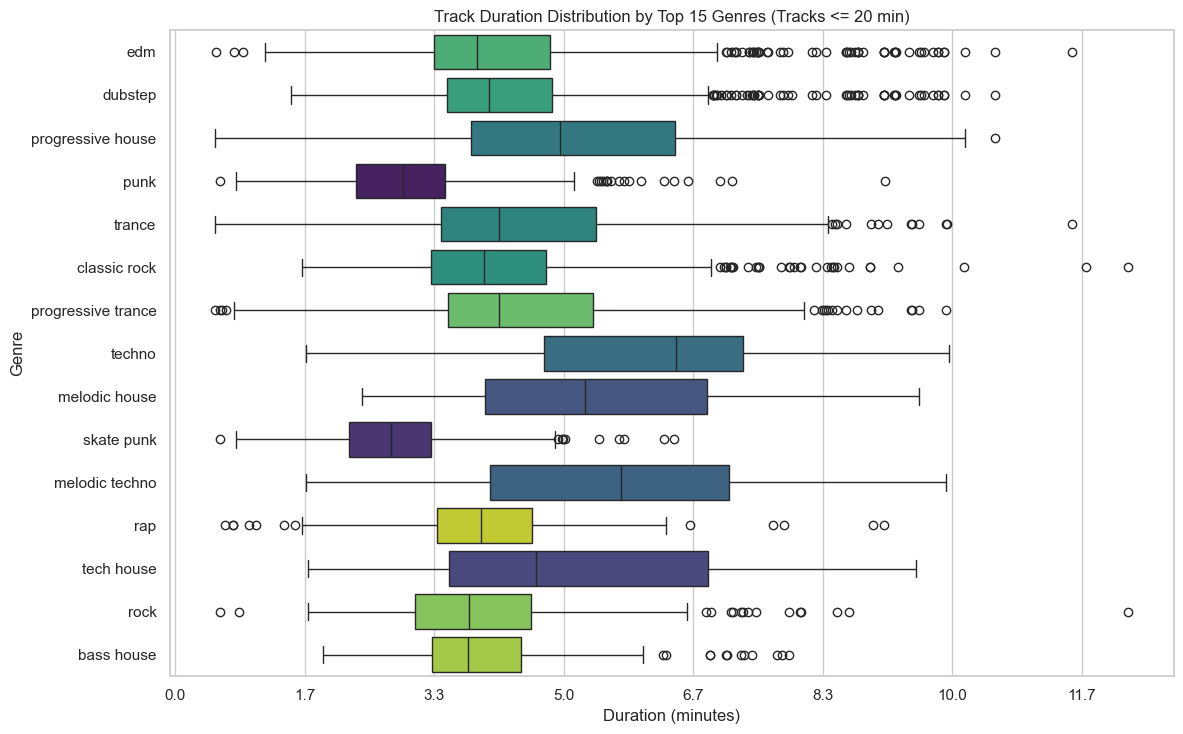


--- Duration Trend Over Release Years (Tracks <= 20 min) ---


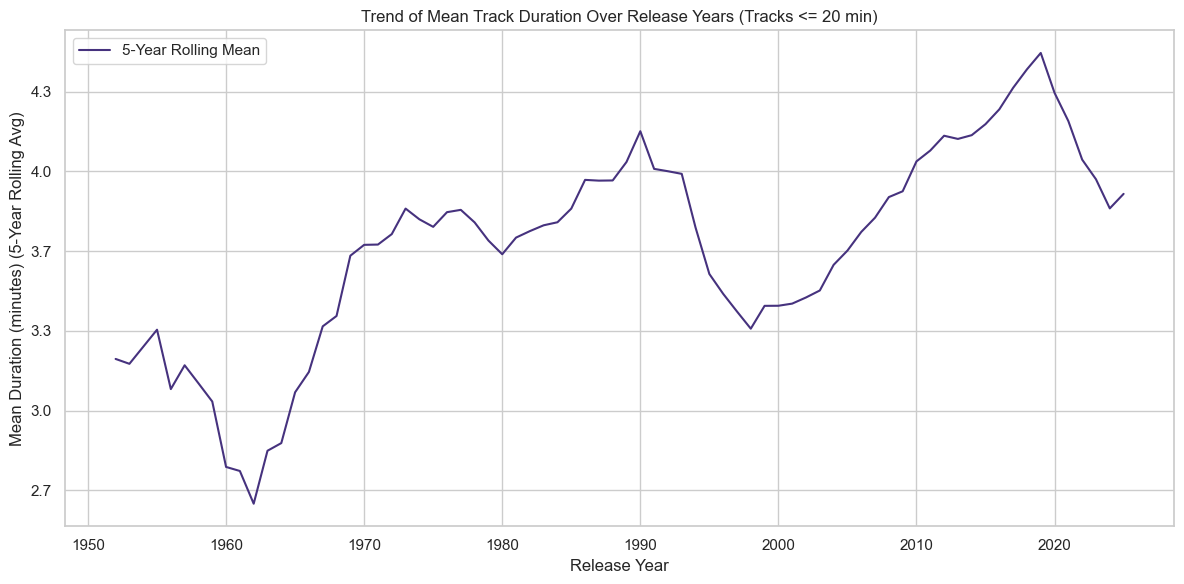

In [28]:
if df is not None and 'duration_ms' in df.columns:
    print("\n--- Analyzing Track Duration by Genre and Year ---")

    # --- Filter for Duration Analysis (Apply the same filter as in Section 7) ---
    MAX_DURATION_MINUTES = 20
    max_duration_ms = MAX_DURATION_MINUTES * 60 * 1000
    print(f"\n--- Filtering data for duration analysis (<= {MAX_DURATION_MINUTES} minutes) ---")
    # Create a filtered copy for these duration analyses
    df_dur_filtered_genre_year = df[df['duration_ms'] <= max_duration_ms].copy()
    print(f"Original track count: {len(df)}, Filtered track count: {len(df_dur_filtered_genre_year)}")
    # --- End Filter ---

    # Proceed only if filtered data is not empty
    if not df_dur_filtered_genre_year.empty:

        # --- Duration by Top Genres (using filtered data) ---
        print(f"\n--- Duration by Top Genres (Tracks <= {MAX_DURATION_MINUTES} min) ---")
        # Pass the filtered dataframe
        ax_dur_genre = af.plot_feature_by_genre(df_dur_filtered_genre_year, feature='duration_ms', top_n_genres=15, plot_type='box')
        if ax_dur_genre:
            # Optional: Convert x-axis labels to minutes
            import matplotlib.ticker as mticker
            formatter = mticker.FuncFormatter(lambda ms, x: f'{ms/60000:.1f}')
            ax_dur_genre.xaxis.set_major_formatter(formatter)
            ax_dur_genre.set_xlabel('Duration (minutes)')
            # Update title to reflect filtering
            ax_dur_genre.set_title(f'Track Duration Distribution by Top 15 Genres (Tracks <= {MAX_DURATION_MINUTES} min)')
            plt.show()
        else:
            print("Could not generate duration by genre plot (using filtered data).")

        # --- Duration Trend Over Release Years (using filtered data) ---
        print(f"\n--- Duration Trend Over Release Years (Tracks <= {MAX_DURATION_MINUTES} min) ---")
         # Pass the filtered dataframe
        ax_dur_year = af.plot_feature_over_release_years(df_dur_filtered_genre_year, feature='duration_ms', window=5, agg_func='mean')
        if ax_dur_year:
            # Optional: Convert y-axis labels to minutes
            formatter = mticker.FuncFormatter(lambda ms, x: f'{ms/60000:.1f}')
            ax_dur_year.yaxis.set_major_formatter(formatter)
            ax_dur_year.set_ylabel('Mean Duration (minutes) (5-Year Rolling Avg)')
             # Update title to reflect filtering
            ax_dur_year.set_title(f'Trend of Mean Track Duration Over Release Years (Tracks <= {MAX_DURATION_MINUTES} min)')
            plt.show()
        else:
            print("Could not generate duration over release years plot (using filtered data).")

    else:
         print(f"No tracks found with duration <= {MAX_DURATION_MINUTES} minutes.")

else:
    print("Skipping Duration Analysis by Genre/Year: DataFrame not loaded or 'duration_ms' missing.")


# 
# ## 14. Time Series: Cumulative Library Growth




--- Plotting Cumulative Library Growth ---


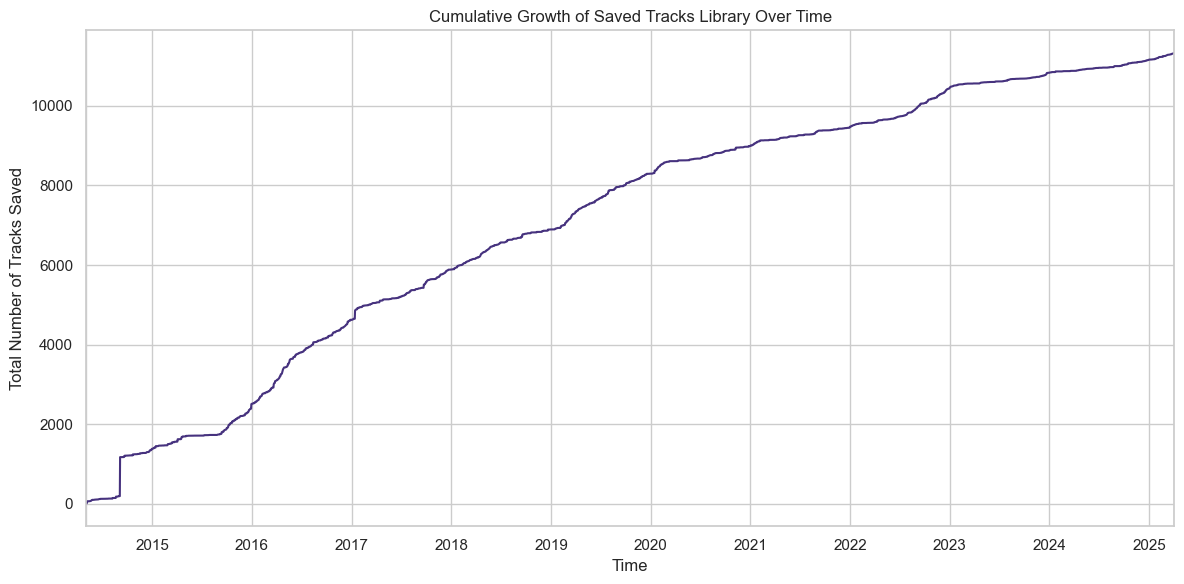

In [22]:
if df is not None and 'added_at' in df.columns:
    print("\n--- Plotting Cumulative Library Growth ---")
    df_ts = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_ts['added_at']):
        df_ts['added_at'] = pd.to_datetime(df_ts['added_at'], errors='coerce', utc=True)
    df_ts = df_ts.dropna(subset=['added_at']).set_index('added_at')

    # Resample (e.g., daily or weekly) and calculate cumulative sum
    cumulative_tracks = df_ts.resample('D').size().cumsum()

    plt.figure(figsize=(12, 6))
    ax_cum = cumulative_tracks.plot()
    ax_cum.set_title('Cumulative Growth of Saved Tracks Library Over Time')
    ax_cum.set_xlabel('Time')
    ax_cum.set_ylabel('Total Number of Tracks Saved')
    # Optional: Add markers for milestones like 1k, 5k, 10k tracks?
    plt.show()

else:
    print("Skipping Cumulative Growth Analysis: DataFrame not loaded or 'added_at' missing.")

# 
# ## 15. Time Series: Time Between Adds




--- Analyzing Time Between Track Additions ---

Descriptive Statistics for Time Between Adds (Minutes):


count    11325.000000
mean       506.836652
std       1937.434878
min          0.000000
10%          0.000000
25%          0.133333
50%          6.366667
75%         59.233333
90%       1284.660000
95%       2776.753333
99%       8396.312000
max      44452.050000
Name: added_at, dtype: float64

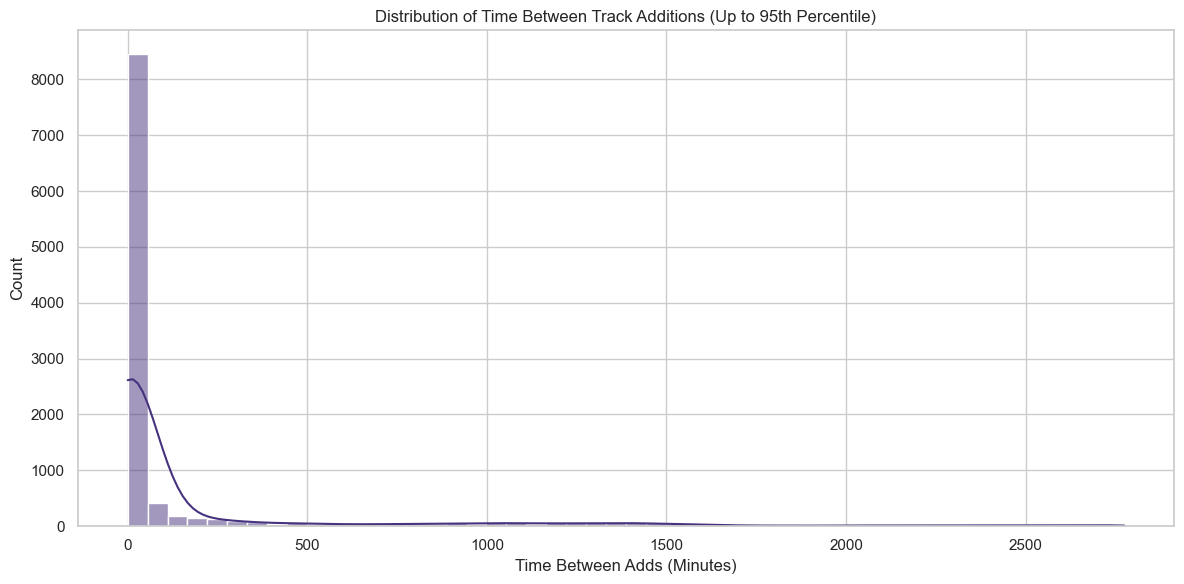

In [23]:

if df is not None and 'added_at' in df.columns:
    print("\n--- Analyzing Time Between Track Additions ---")
    df_ts = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_ts['added_at']):
        df_ts['added_at'] = pd.to_datetime(df_ts['added_at'], errors='coerce', utc=True)
    df_ts = df_ts.dropna(subset=['added_at']).sort_values('added_at')

    # Calculate difference between consecutive adds
    time_diffs = df_ts['added_at'].diff()

    # Convert to a more interpretable unit (e.g., minutes or hours)
    time_diffs_minutes = time_diffs.dt.total_seconds() / 60
    # time_diffs_hours = time_diffs.dt.total_seconds() / 3600

    print("\nDescriptive Statistics for Time Between Adds (Minutes):")
    # Describe will show mean, std, min, max, quartiles - useful for skewed data
    display(time_diffs_minutes.describe(percentiles=[.1, .25, .5, .75, .9, .95, .99]))

    # Plot distribution (likely need to zoom or use log scale)
    plt.figure(figsize=(12, 6))
    # Filter out very large differences for a clearer histogram of typical times
    reasonable_diffs = time_diffs_minutes[time_diffs_minutes < time_diffs_minutes.quantile(0.95)] # Exclude longest 5%
    ax_diff = sns.histplot(reasonable_diffs.dropna(), bins=50, kde=True)
    ax_diff.set_title('Distribution of Time Between Track Additions (Up to 95th Percentile)')
    ax_diff.set_xlabel('Time Between Adds (Minutes)')
    # Optional: Log scale
    # ax_diff.set_xscale('log')
    # ax_diff.set_xlabel('Time Between Adds (Minutes) [Log Scale]')
    plt.show()

else:
    print("Skipping Time Between Adds Analysis: DataFrame not loaded or 'added_at' missing.")

# 
# ## 16. Time Series: Decomposition (Requires statsmodels)




--- Decomposing Monthly Track Addition Time Series ---


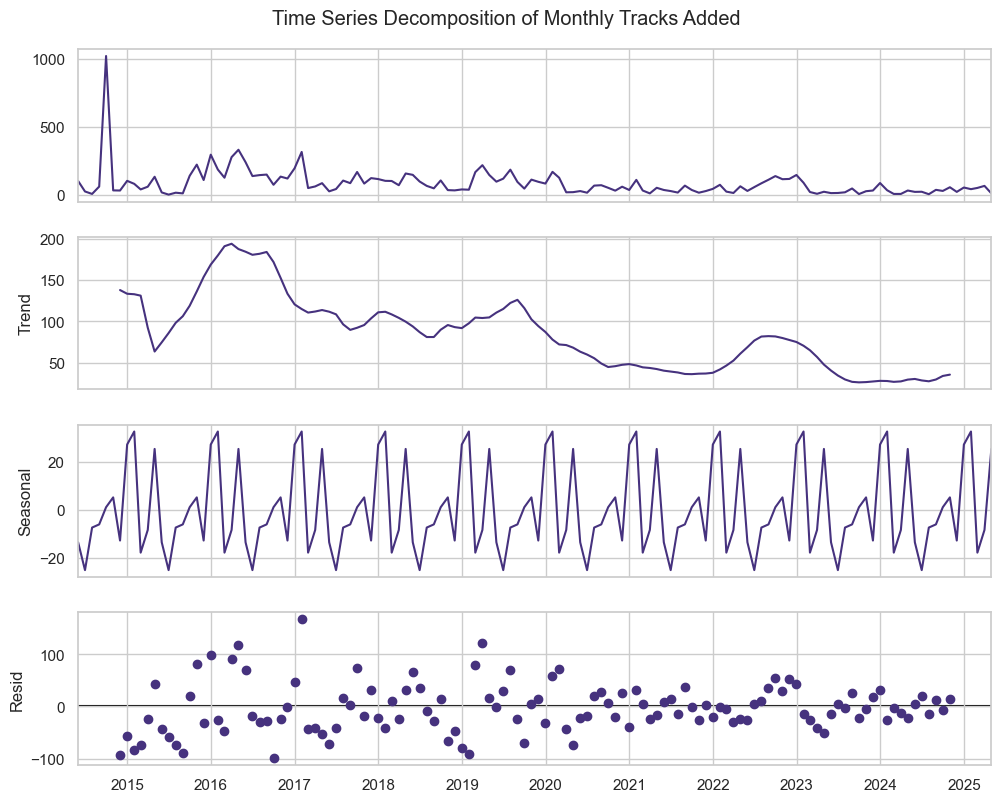

In [24]:

try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    STATSMODELS_AVAILABLE = True
except ImportError:
    print("statsmodels library not found. Skipping decomposition analysis.")
    print("Install using: pip install statsmodels")
    STATSMODELS_AVAILABLE = False

if df is not None and 'added_at' in df.columns and STATSMODELS_AVAILABLE:
    print("\n--- Decomposing Monthly Track Addition Time Series ---")
    df_ts = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_ts['added_at']):
        df_ts['added_at'] = pd.to_datetime(df_ts['added_at'], errors='coerce', utc=True)
    df_ts = df_ts.dropna(subset=['added_at']).set_index('added_at')

    # Create a regular time series (e.g., monthly counts)
    # Need to ensure there are enough periods for decomposition (e.g., > 2 years for monthly)
    monthly_counts = df_ts.resample('ME').size()

    if len(monthly_counts) >= 24: # Need at least 2 full cycles for seasonal component
        try:
            # Use multiplicative model if counts vary a lot, additive otherwise
            decomposition = seasonal_decompose(monthly_counts, model='additive', period=12) # period=12 for yearly seasonality in monthly data

            fig_decomp = decomposition.plot()
            fig_decomp.set_size_inches(10, 8)
            fig_decomp.suptitle('Time Series Decomposition of Monthly Tracks Added', y=1.02)
            plt.show()
        except ValueError as e:
            print(f"Could not perform decomposition (maybe not enough data?): {e}")
        except Exception as e:
             print(f"An error occurred during decomposition: {e}")
    else:
        print("Skipping decomposition: Need at least 24 months of data for yearly seasonality analysis.")

else:
    if STATSMODELS_AVAILABLE: print("Skipping Decomposition Analysis: DataFrame not loaded or 'added_at' missing.")